In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jjoo = pd.read_csv("data/athlete_events.csv")
jjoo

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [3]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


---
# NULOS Y PREPARACIÓN DATASET
---

## Identificación y tratamiento de nulos

In [4]:
jjoo.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
#Para tratar los nulos de los medallas, simplement asigno No Medal ("NoM") en lugar de NaN
jjoo["Medal"] = jjoo["Medal"].fillna("NoM")

In [6]:
#Para los nulos de edad, altura y peso, sustuiremos la mediana por sexo, ya que son variables secundarias.

jjoo["Height"] = jjoo.groupby(["Sex"])['Height'].transform(lambda x: x.fillna(x.median()))
jjoo["Age"] = jjoo.groupby(["Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
jjoo["Weight"] = jjoo.groupby(["Sex"])['Weight'].transform(lambda x: x.fillna(x.median()))

In [7]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Añadir la columna Country

In [8]:
# Consultando las columnas observamos que para cada NOC (Comíté Olímpico Nacional) le corresponden diferentes equipos. 
# Vamos a analizarlos bien, para que así a cada atleta le coresponda simplemente el nombre de su país
jjoo.groupby("NOC")["Team"].nunique().sort_values(ascending=False)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
      ... 
VNM      1
YEM      1
YAR      1
YMD      1
ZAM      1
Name: Team, Length: 230, dtype: int64

Efectivamente para cada NOC le corresponden diferentes equipos. Vamos a utilizar el otro dataset de la entrada principal, que relaciona NOCs con países.

In [9]:
noc = pd.read_csv('data/noc_regions.csv')
noc = noc.drop("notes", axis = 1)
noc = noc.rename(columns = {"region": "Country"})

In [10]:
noc

NOC      Country
0    AFG  Afghanistan
1    AHO      Curacao
2    ALB      Albania
3    ALG      Algeria
4    AND      Andorra
..   ...          ...
225  YEM        Yemen
226  YMD        Yemen
227  YUG       Serbia
228  ZAM       Zambia
229  ZIM     Zimbabwe

[230 rows x 2 columns]

In [11]:
# Unimos los dos datasets a través de la columna NOC para que aparezca la columna Country en nuestro dataset principal
# El join es left porque queremos todos los países participantes, tengan NOC o no asociado

jjoo_merge = jjoo.merge(noc, 
                        left_on = "NOC", 
                        right_on = "NOC", 
                        how = "left")

In [12]:
#Por consenso colectivo, nos vamos a quedar con los eventos de verano
jjoo = jjoo_merge[jjoo_merge["Season"] == "Summer"]

In [13]:
#Comprobamos si hay NOC/Equipos que no tiene país asignado
jjoo_merge.loc[jjoo_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

NOC                      Team
578     SGP                 Singapore
6267    ROT  Refugee Olympic Athletes
44376   SGP              June Climene
61080   UNK                   Unknown
64674   TUV                    Tuvalu
80986   SGP                   Rika II
108582  SGP               Singapore-2
235895  SGP               Singapore-1

In [14]:
#Les asignamos país manualmente

jjoo.loc[jjoo['NOC']=='SGP', "Country"] = "Singapore"
jjoo.loc[jjoo['NOC']=='ROT', "Country"] = "Refugee Olympic Athletes"
jjoo.loc[jjoo['NOC']=='UNK', "Country"] = "Unknown"
jjoo.loc[jjoo['NOC']=='TUV', "Country"] = "Tuvalu"



In [15]:
#Elimamos la columna de Team, para quedarnos con Country como referencia
jjoo = jjoo.drop(["Team"], axis = 1)

## Crear columnas Has_Medal


In [16]:
#Para simplificarnos la vida, vamos a hacer una columna que indique si el atleta tiene o medalla o no, independientemente del metal

jjoo["Has_Medal"] = "0"
jjoo.loc[jjoo["Medal"] != "NoM", "Has_Medal"] = 1

# Forzar a que Has_Medal sea numérico 
jjoo['Has_Medal'] = pd.to_numeric(jjoo['Has_Medal'], errors='coerce').astype(int)

---
# ANÀLISIS GLOBAL
---

## Identificar deportes de equipo

In [17]:
# Haciendo una prueba de un deporte de equipo, podemos comprovar que las medallas estan asignadas por atletas. 
# Como en los medalleros se cuenta 1 medalla por deporte de equipo, primero tenemos que encontrar los deportes de equipo y asignarles solo una medalla.
jjoo.loc[(jjoo.Sport == "Handball") & (jjoo["Medal"] == "Gold") & (jjoo.Year == 2016) & (jjoo.Sex == "M")]

ID                      Name Sex   Age  Height  Weight  NOC  \
41295    21299         Mads Christiansen   M  30.0   197.0    93.0  DEN   
90256    45732        Henrik Toft Hansen   M  29.0   200.0   105.0  DEN   
90337    45782             Mikkel Hansen   M  28.0   196.0    98.0  DEN   
90361    45793           Ren Toft Hansen   M  31.0   200.0   105.0  DEN   
107590   54379    Henrik Mllgaard Jensen   M  31.0   197.0   102.0  DEN   
126854   63955    Jannick Green Krejberg   M  27.0   195.0    95.0  DEN   
131775   66315    Niklas Landin Jacobsen   M  27.0   201.0   102.0  DEN   
132743   66820        Mads Mensah Larsen   M  24.0   188.0   106.0  DEN   
164022   82327   Casper Ulrich Mortensen   M  26.0   190.0    88.0  DEN   
171165   86018  Michael Damgaard Nielsen   M  26.0   192.0    92.0  DEN   
173690   87255            Jesper Nddesbo   M  35.0   199.0   100.0  DEN   
176797   88896              Morten Olsen   M  31.0   184.0    95.0  DEN   
225969  113553   Kasper Sndergaard Sarup   M  35.0   195.0    95.0  DEN   
232967  116859   Lasse Jemon Svan Hansen   M  32.0   185.0    85.0  DEN   

              Games  Year  Season            City     Sport  \
41295   2016 Summer  2016  Summer  Rio de Janeiro  Handball   
90256   2016 Summer  2016  Summer  Rio de Janeiro  Handball   
90337   2016 Summer  2016  Summer  Rio de Janeiro  Handball   
90361   2016 Summer  2016  Summer  Rio de Janeiro  Handball   
107590  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
126854  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
131775  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
132743  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
164022  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
171165  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
173690  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
176797  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
225969  2016 Summer  2016  Summer  Rio de Janeiro  Handball   
232967  2016 Summer  2016  Summer  Rio de Janeiro  Handball   

                          Event Medal  Country  Has_Medal  
41295   Handball Men's Handball  Gold  Denmark          1  
90256   Handball Men's Handball  Gold  Denmark          1  
90337   Handball Men's Handball  Gold  Denmark          1  
90361   Handball Men's Handball  Gold  Denmark          1  
107590  Handball Men's Handball  Gold  Denmark          1  
126854  Handball Men's Handball  Gold  Denmark          1  
131775  Handball Men's Handball  Gold  Denmark          1  
132743  Handball Men's Handball  Gold  Denmark          1  
164022  Handball Men's Handball  Gold  Denmark          1  
171165  Handball Men's Handball  Gold  Denmark          1  
173690  Handball Men's Handball  Gold  Denmark          1  
176797  Handball Men's Handball  Gold  Denmark          1  
225969  Handball Men's Handball  Gold  Denmark          1  
232967  Handball Men's Handball  Gold  Denmark          1

In [18]:
# Si la suma de medallistas por país en un evento es > 1, es equipo.
# Usamos transform para devolver el resultado al tamaño original del dataframe.
jjoo['Team_Event'] = jjoo.groupby(['Year', 'Country', 'Event','Medal'])['Has_Medal'].transform('sum') > 1

# Corregir los empates en deportes individuales (falsos positivos)
individual_ties = ["Athletics Men's Pole Vault",
                   "Gymnastics Men's Horizontal Bar",
                   "Gymnastics Men's Horse Vault",
                   "Gymnastics Men's Horizontal Bar",
                   "Gymnastics Men's Pommelled Horse",
                   "Gymnastics Women's Balance Beam",
                   "Swimming Women's 100 metres Freestyle",
                   "Swimming Men's 50 metres Freestyle"]

jjoo.loc[jjoo['Event'].isin(individual_ties), 'Team_Event'] = False

## Crear recuento de medallas

In [19]:
# Crear el Tally consolidado (una fila por medalla real)
medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Sport", "Event", "Medal"]
).agg(
    Athletes_in_podium=("Has_Medal", "sum"), 
    Is_team=("Team_Event", "max")        # Detectará True si al menos uno era de equipo
).reset_index()

# Cada fila ahora representa una "Medalla Única" para el medallero nacional
medals_tally['Medal_count'] = 1

## Potencias mundiales

In [20]:
# Sumamos el total por país
medals_total = medals_tally.groupby("Country")["Medal_count"].sum().sort_values(ascending=False)

# Seleccionamos el Top 10
top_10_countries = medals_total.head(10)

In [21]:
top_10_countries

Country
USA          2544
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Medal_count, dtype: int64

## Distribución medallas individuales/equipo Top 10 potencias

Finalmente tenemos la tabla de las 10 potencias olímpicas históricas. Aprovechamos que hemos diferenciado deportes de equipos y deportes individuales para ver cómo de distribuyen las medallas en estas 10 potencias.

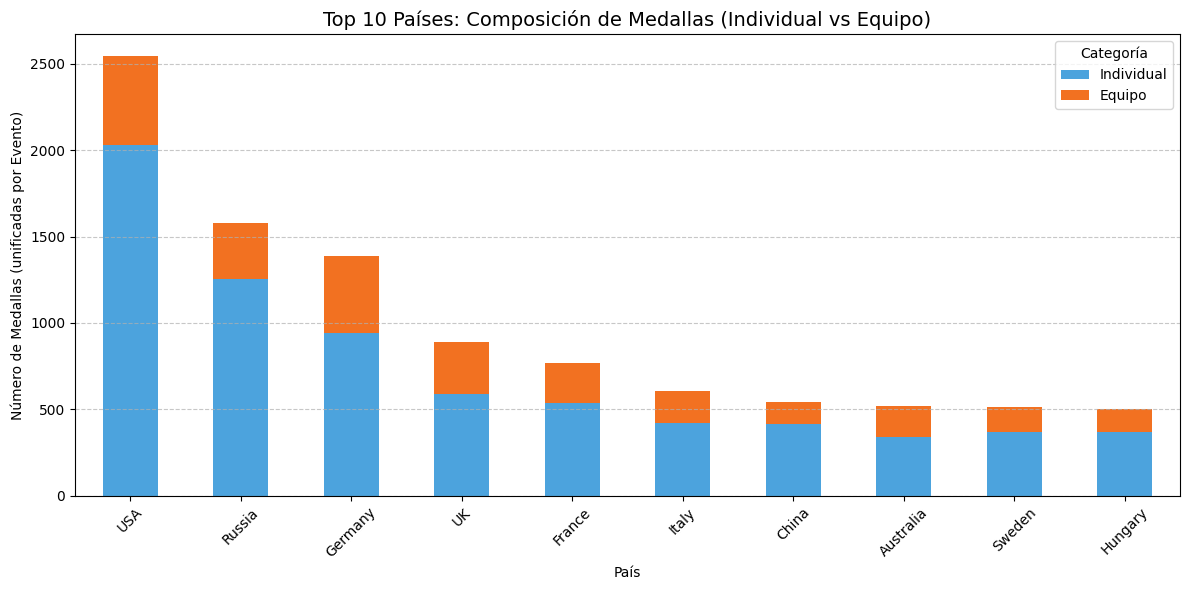

In [22]:
# Mapeamos False a 'Individual' y True a 'Equipo'
medals_tally['Kind_Event'] = medals_tally['Is_team'].map({False: 'Individual', True: 'Equipo'})

# Filtramos solo para los países del Top 10
df_plot = medals_tally[medals_tally['Country'].isin(top_10_countries.index)]

# El truco aquí es no renombrar columnas a mano, sino dejar que el mapeo lo haga solo
composition = pd.crosstab(df_plot['Country'], df_plot['Kind_Event'])

# Ordenar por el total de medallas original y reordenar columnas
composition = composition.loc[top_10_countries.index, ['Individual', 'Equipo']]

# Gráfico de barras apiladas
ax = composition.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4ca3dd', '#f27121'])

plt.title('Top 10 Países: Composición de Medallas (Individual vs Equipo)', fontsize=14)
plt.ylabel('Número de Medallas (unificadas por Evento)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("img/Sergi/composicion_top10.png")
plt.show()

- Hay una hegemonía evidente de EEUU. No sólo lidera el ranking, sino que su número total de medallas es significativamente superior que el del segundo lugar (Rusia), superándolo por casi 1000 unidades. Esto sugiere una infraestructura deportiva masiva y diversificada a lo largo del tiempo.
- Aunque todos los países ganan más medallas individuales que de equipo, la proporción varía de manera interesante:
    - Países como EEUU, Rusia y China muestran una base sólida en deportes individuales.
    - Alemania destaca por tener una proporción de medalla de deportes de equipo muy significativa. Esto indica que es una potencia histórica en deportes colectivos (fútbol, hockey, balonmano...) en comparación con otros países europeos.
- Aparecen potencias históricas tradicionales como Frfancia, Italia o Reino Unido. Destacan países pequeños como Suecia y Hungria, con poblaciones muy menores a las grandees potencias y centrada en disciplinas específicas donde históricamente han sido fuertes (como la esgrima o el waterpolo en el caso de Hungría).
- Los últimos 4 países presentan mucha igualdad, lo que indica una competencia muy feroz, seguramente más amplia con otros países del Top 20.


## Evolución temporal potencias medallero

In [23]:
# Genero una lista con las 10 primeras potencias
list_top_10 = top_10_countries.index.tolist()

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country = medals_tally.groupby(["Year","Country"])["Medal_count"].sum().unstack(fill_value=0)

#Filtro las 10 primeras potencias
year_country = year_country.loc[:, list_top_10]


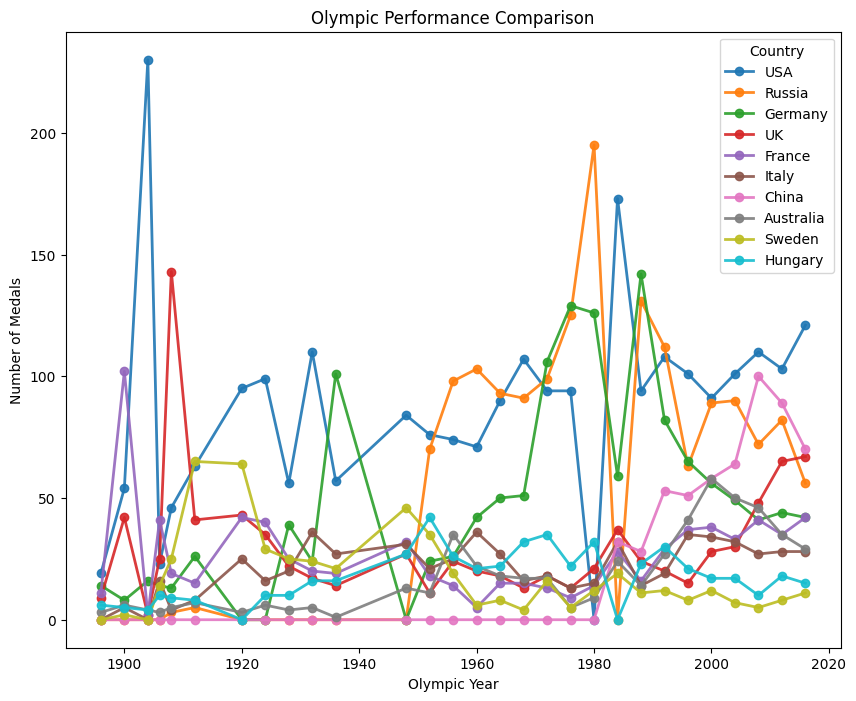

In [24]:
year_country.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison')

plt.savefig("img/historico_10.png");

Para analizar la evolución temporal nos vamos a centrar sólo en 4 países: EEUU, Rusia, Alemania y China. Los 3 primeros no sólo pertenecen al Top 3, sino que presentan variaciones históricas interesantes. En cuanto a China, es una potencia emergente moderna y una de las potencias del siglo XXI. Los otros países presentan una variación bastante parecida y constante.

In [25]:
# Repetimos pero solo seleccionamos los país que nos interesan
top_countries = ["USA","Russia","Germany","China"]

#Filtramos sólo los Top 4 países
year_country4 = year_country.loc[:, top_countries]

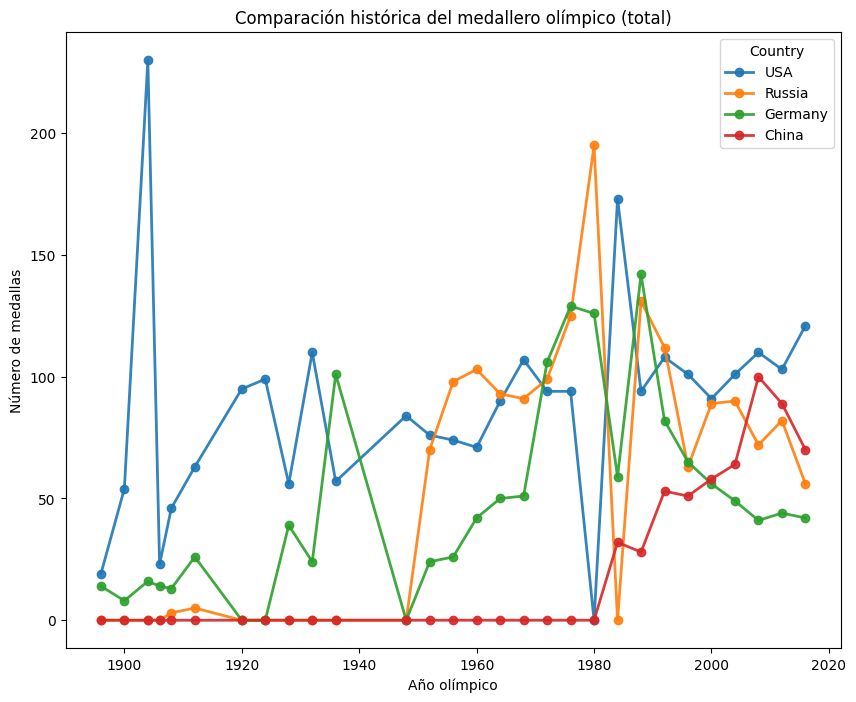

In [26]:
year_country4.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas')
plt.title('Comparación histórica del medallero olímpico (total)')

plt.savefig("img/historico_4.png");

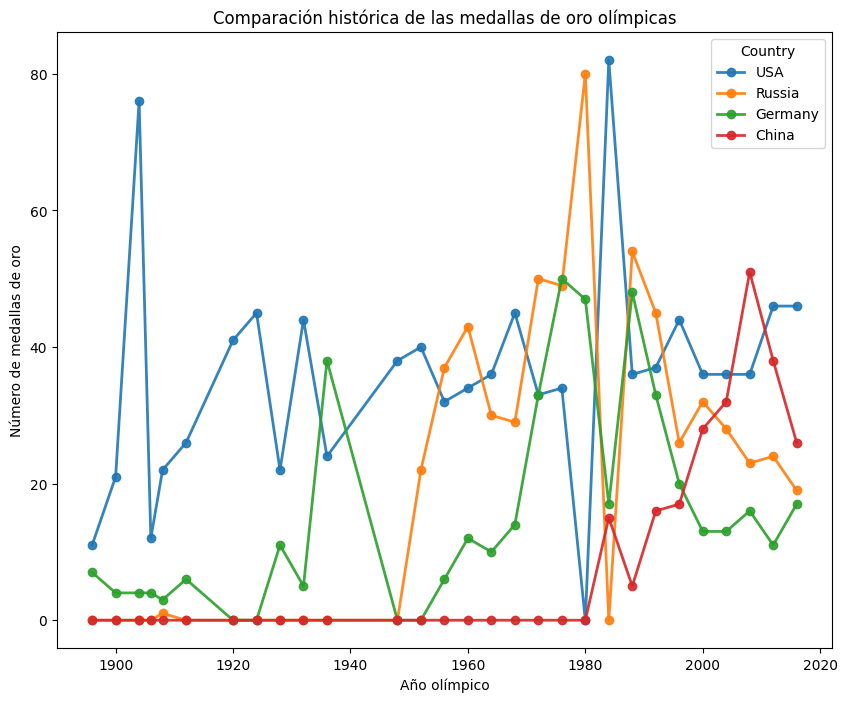

In [27]:
#La mayoría de tablas de medallas se ordenan por oros, así que repetimos el proceso para obtener la gráfica de oros.

gold_medals_total = medals_tally[medals_tally["Medal"] == "Gold"]
gold_medals_country = gold_medals_total.groupby(["Country"])["Medal_count"].sum()
year_country4_gold = gold_medals_total.groupby(["Year","Country"])["Medal_count"].sum().unstack(fill_value=0)
year_country4_gold = year_country4_gold.loc[:, top_countries]

year_country4_gold.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas de oro')
plt.title('Comparación histórica de las medallas de oro olímpicas')

plt.savefig("img/oro_4.png");

Sólo con las tendencias individuales ya encontramos cosas interesantes que se deben analizar con detenimiento:
    - **EEUU**: un pico altísimo a principios del siglo XX, una tendencia bastante constante durante el siglo XX, 0 medallas en 1980 y el màximo histórico de medalla la edición siguiente. Des de entonces ha estado batallando por el primer lugar.
    - **Rusia**: aperece desde mediados de siglo y asciende meteóricamente hasta 1980 (cuando EEUU es baja). En 1984 seguramente no participó y des de entonces ha batallado con tropiezos como el bloque deportivo por dopaje, pero sigue en el Top. Aquí se ha simplificado, ya que Rusia participó cómo parte de la URSS a lo largo de muchas ediciones.
    - **Alemania**: tiene un gran pico en los años 30 (entre Guerras Mundiales) y una subida significativa en los años 60, un gran descenso en 1984 y un descenso paulatino desde entonces.
    - **China**: empieza a ganar medallas desde 1984 y sube drásticamente culminándolo en los juegos de Pequín en 2008.

Es necesario analizar las potencias individualmente pero también en relación a otras potencias. Además hay que hacer un recorrido históricas teniéndo en cuenta las siguientes etapas:
    - Pre IGM
    - IGM
    - Entre guerras
    - IIGM
    - Guerra Fría
    - Final siglo XX
    - Siglo XXI

Hay que analizar la relación entre Rusia y la URSS y la batalla Rusia - EEUU durante la Guerra Fría.

## Proporción metales potencias

Vamos a comprobar si la proporción de metales es coherente com el ranking y si hay un ranking también de oros.

In [28]:
# Filtramos los 4 países escogidos
medals_tally_top = medals_tally[medals_tally["Country"].isin(top_countries)]

# Unstack ahora nos permite separar las medallas por columnas y asignarlas al total de cada país
medals_by_country = medals_tally_top.groupby(["Country","Medal"])["Medal_count"].sum().unstack(fill_value=0)

# Ordenamos los metales
medals_by_country = medals_by_country.loc[:, ['Gold', 'Silver', 'Bronze']]

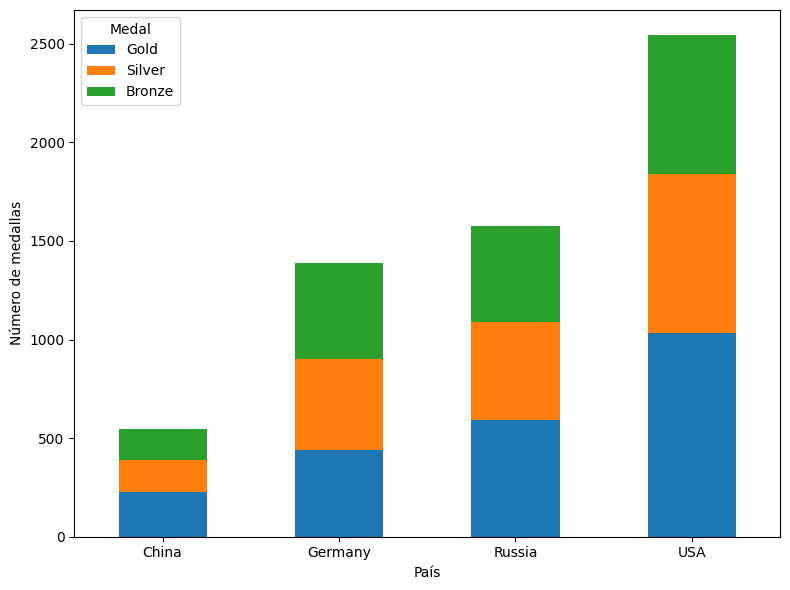

In [29]:
ax = medals_by_country.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
plt.xlabel('País')
plt.ylabel('Número de medallas')

plt.tight_layout()
plt.savefig("img/proporcion_4.png")
plt.show()

Ningún país depende exclusivamente de un solo tipo de medalla; todos muestran una distribución relativamente balanceada entre oro, plata y bronce.

## Deportes más laureados

Para intentar desentrañar un poco el éxito de estas potencias, vamos a buscar cuáles son les deportes que les dan más medallas.

In [30]:
best_sports_gold = medals_tally_top.groupby(["Country","Sport","Medal"])["Medal_count"].sum().unstack(fill_value=0).reset_index()
best_sports_gold = best_sports_gold.drop(["Bronze","Silver"], axis = 1)
best_sports_gold = best_sports_gold.sort_values(by=["Country","Gold"], ascending = [True,False])
best_sports_gold = best_sports_gold.groupby("Country").head(5)
best_sports_gold

Medal  Country          Sport  Gold
8        China         Diving    40
29       China  Weightlifting    34
24       China   Table Tennis    28
12       China     Gymnastics    26
20       China       Shooting    22
34     Germany      Athletics    72
50     Germany         Rowing    64
54     Germany       Swimming    55
37     Germany       Canoeing    52
40     Germany  Equestrianism    41
66      Russia      Athletics    97
94      Russia      Wrestling    97
77      Russia     Gymnastics    90
93      Russia  Weightlifting    47
70      Russia       Canoeing    32
97         USA      Athletics   344
124        USA       Swimming   246
122        USA       Shooting    54
133        USA      Wrestling    52
101        USA         Boxing    50

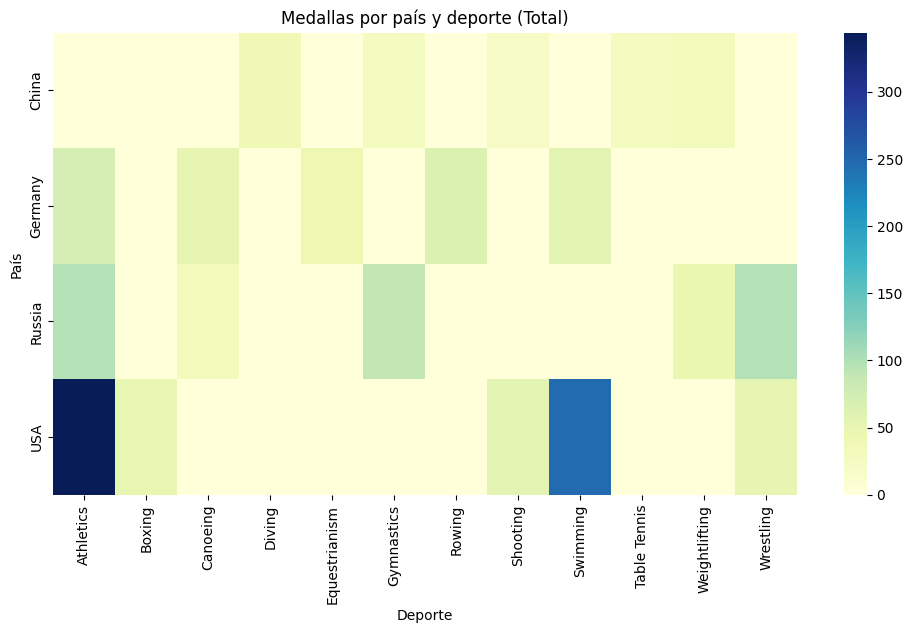

In [31]:
heatmap_data = best_sports_gold.pivot(index="Country", columns="Sport", values="Gold").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, fmt=".0f", cmap="YlGnBu")
plt.title("Medallas por país y deporte (Total)")
plt.xlabel("Deporte")
plt.ylabel("País")
plt.show()

Unas claves del éxito es la especialización en deportes diferentes, ya que cada país tiene deportes estratégicos donde se concentra sus recursos y logra la mayoría de sus medallas. China y Rusia muestran concentración en unos pocos deportes. Alemania y Rusia están más distribuidos, aunque USA tiene concentración extrema en atletismo y natación. Cada país parece enfocarse en deportes donde históricamente ha invertido recursos y programas de entrenamiento especializados. Algunos deportes aparecen como “vacíos” para ciertos países, lo que indica falta de inversión o tradición. Se puede usar para planificar inversiones futuras, analizar competencias internacionales o estudiar cómo la especialización y la cultura deportiva influyen en los resultados olímpicos.


Estados Unidos destaca por los deportes técnicos individuales de alto rendimiento, como atletismo y natación. Sobresale en deportes que requieren velocidad, resistencia y entrenamiento sistemático.
Russia tiene una gran especialización en 3 deportes, como atletismo, gimnástica y lucha libre. Fuerte en deportes que combinan fuerza y técnica; gran parte en gimnasia y deportes de combate.
Alemania también puntúa en atletismo y natación, pero destaca en deportes de forma aislada como en equitación y remo. Tiene un buen balance entre deportes de resistencia y fuerza, y tiene una buena tradición en deportes de equipo y acuáticos.
Por último, China se centra en deportes de precisión y fuerza, dominando en deportes que tradicionalmente se asocian con su programa olímpico moderno. Destaca en deportes de forma única, cómo en salto de trampolín y ping-pong.



## Análisis con PIB y población

In [32]:
GDP = pd.read_csv("data/world_gdp.csv", skiprows=3)
pop = pd.read_csv("data/world_pop.csv")

In [33]:
# Quitamos las columnas que no nos interesan
GDP = GDP.drop(["Indicator Name","Indicator Code"], axis = 1)

# Con las años por columnas es difícil procesar datos. idvars fija columnas, var_name colapsa columnas en una, los valores numéricos en las celda se mueven a una nueva columna
GDP = pd.melt(GDP, id_vars = ["Country Name","Country Code"], var_name = "Year", value_name = "GDP")

# Nos aseguramos que los años sean tipo numérico
GDP.Year = pd.to_numeric(GDP["Year"])



Com queremos añadir los datos de PIB y de población en el dataset principal, vamos a comprovar cúal es la clave más común.

In [34]:
# Comprovamos cuántos códigos de países (NOC) existen en el dataset de los Juegos Olímpicos que NO aparecen en el dataset de GDP

print(f"No coinciden {len(list(set(jjoo['NOC'].unique()) - set(GDP['Country Code'].unique())))} códigos de países")

# Comprovamos cuántos países existen en el dataset de los Juegos Olímpicos que NO aparecen en el dataset de GDP

print(f"No coinciden {len(list(set(jjoo['Country'].unique()) - set(GDP['Country Name'].unique())))} nombres de países")

No coinciden 108 códigos de países
No coinciden 6 nombres de países


Como sólo hay 6 países que no coinciden, lo utilizaremos como clave común para fusionar los dos datasets.

In [35]:
# Fusionamos para tener los códigos de países

olympics_merge = jjoo.merge(GDP[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Country',
                                            right_on = 'Country Name',
                                            how = 'left')

# Quitamos la columna duplicada

olympics_merge.drop('Country Name', axis = 1, inplace = True)

# Fusionameos para obtener el PIB

olympics_merge_gdp = olympics_merge.merge(GDP,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [36]:
olympics_merge_gdp

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0   179.0    74.0   
3            4                Edgar Lindenau Aabye   M  34.0   179.0    74.0   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0    59.0   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

        NOC        Games  Year  Season            City       Sport  \
0       CHN  1992 Summer  1992  Summer       Barcelona  Basketball   
1       CHN  2012 Summer  2012  Summer          London        Judo   
2       DEN  1920 Summer  1920  Summer       Antwerpen    Football   
3       DEN  1900 Summer  1900  Summer           Paris  Tug-Of-War   
4       NED  1932 Summer  1932  Summer     Los Angeles   Athletics   
...     ...          ...   ...     ...             ...         ...   
222547  ARG  2004 Summer  2004  Summer          Athina      Hockey   
222548  USA  1972 Summer  1972  Summer          Munich    Football   
222549  RUS  2000 Summer  2000  Summer          Sydney      Rowing   
222550  RUS  2004 Summer  2004  Summer          Athina      Rowing   
222551  BLR  2016 Summer  2016  Summer  Rio de Janeiro  Basketball   

                                         Event Medal      Country  Has_Medal  \
0                  Basketball Men's Basketball   NoM        China          0   
1                 Judo Men's Extra-Lightweight   NoM        China          0   
2                      Football Men's Football   NoM      Denmark          0   
3                  Tug-Of-War Men's Tug-Of-War  Gold      Denmark          1   
4                 Athletics Women's 100 metres   NoM  Netherlands          0   
...                                        ...   ...          ...        ...   
222547                     Hockey Men's Hockey   NoM    Argentina          0   
222548                 Football Men's Football   NoM          USA          0   
222549  Rowing Men's Lightweight Coxless Fours   NoM       Russia          0   
222550  Rowing Men's Lightweight Coxless Fours   NoM       Russia          0   
222551           Basketball Women's Basketball   NoM      Belarus          0   

        Team_Event Country Code           GDP  
0            False          CHN  4.269160e+11  
1            False          CHN  8.560550e+12  
2            False          DNK           NaN  
3             True          DNK           NaN  
4            False          NLD           NaN  
...            ...          ...           ...  
222547       False          ARG  1.646580e+11  
222548       False          USA  1.282450e+12  
222549       False          RUS  2.597080e+11  
222550       False          RUS  5.910170e+11  
222551       False          BLR  4.740722e+10  

[222552 rows x 19 columns]

In [37]:
# Repetimos el proceso para el dataset de Población, que tiene las mismas características

pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
pop = pd.melt(pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')
pop['Year'] = pd.to_numeric(pop['Year'])
pop.head()

Country Country Code  Year  Population
0        Aruba          ABW  1960     54211.0
1  Afghanistan          AFG  1960   8996351.0
2       Angola          AGO  1960   5643182.0
3      Albania          ALB  1960   1608800.0
4      Andorra          AND  1960     13411.0

In [38]:
olympics_complete = olympics_merge_gdp.merge(pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country_y', axis = 1, inplace = True)
olympics_complete = olympics_complete.rename(columns={'Country_x': 'Country'})
olympics_complete.head()

ID                                Name Sex   Age  Height  Weight  NOC  \
0   1                           A Dijiang   M  24.0   180.0    80.0  CHN   
1   2                            A Lamusi   M  23.0   170.0    60.0  CHN   
2   3                 Gunnar Nielsen Aaby   M  24.0   179.0    74.0  DEN   
3   4                Edgar Lindenau Aabye   M  34.0   179.0    74.0  DEN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0    59.0  NED   

         Games  Year  Season         City       Sport  \
0  1992 Summer  1992  Summer    Barcelona  Basketball   
1  2012 Summer  2012  Summer       London        Judo   
2  1920 Summer  1920  Summer    Antwerpen    Football   
3  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal      Country  Has_Medal  Team_Event  \
0   Basketball Men's Basketball   NoM        China          0       False   
1  Judo Men's Extra-Lightweight   NoM        China          0       False   
2       Football Men's Football   NoM      Denmark          0       False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark          1        True   
4  Athletics Women's 100 metres   NoM  Netherlands          0       False   

  Country Code           GDP    Population  
0          CHN  4.269160e+11  1.164970e+09  
1          CHN  8.560550e+12  1.350695e+09  
2          DNK           NaN           NaN  
3          DNK           NaN           NaN  
4          NLD           NaN           NaN

In [39]:
olympics_complete.isnull().sum()

ID                  0
Name                0
Sex                 0
Age                 0
Height              0
Weight              0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Country             0
Has_Medal           0
Team_Event          0
Country Code     1268
GDP             76832
Population      58871
dtype: int64

In [40]:
#Como sólo tenemos datos de PIB y población a partir de 1961, haremos análisis solamente de estos años.

olympics_complete_subset = olympics_complete.loc[(olympics_complete['Year'] > 1960)]
olympics_complete_subset = olympics_complete_subset.reset_index()
olympics_complete_subset.head()

index  ID                Name Sex   Age  Height  Weight  NOC        Games  \
0      0   1           A Dijiang   M  24.0   180.0    80.0  CHN  1992 Summer   
1      1   2            A Lamusi   M  23.0   170.0    60.0  CHN  2012 Summer   
2      7  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  FIN  2000 Summer   
3      8  13  Minna Maarit Aalto   F  30.0   159.0    55.5  FIN  1996 Summer   
4      9  13  Minna Maarit Aalto   F  34.0   159.0    55.5  FIN  2000 Summer   

   Year  ...       City       Sport                         Event Medal  \
0  1992  ...  Barcelona  Basketball   Basketball Men's Basketball   NoM   
1  2012  ...     London        Judo  Judo Men's Extra-Lightweight   NoM   
2  2000  ...     Sydney   Badminton       Badminton Men's Singles   NoM   
3  1996  ...    Atlanta     Sailing    Sailing Women's Windsurfer   NoM   
4  2000  ...     Sydney     Sailing    Sailing Women's Windsurfer   NoM   

   Country Has_Medal  Team_Event  Country Code           GDP    Population  
0    China         0       False           CHN  4.269160e+11  1.164970e+09  
1    China         0       False           CHN  8.560550e+12  1.350695e+09  
2  Finland         0       False           FIN  1.255400e+11  5.176209e+06  
3  Finland         0       False           FIN  1.320990e+11  5.124573e+06  
4  Finland         0       False           FIN  1.255400e+11  5.176209e+06  

[5 rows x 21 columns]

In [41]:

medals_tally_1960 = olympics_complete_subset[olympics_complete_subset["Has_Medal"] == 1].groupby(["Year", "Country", "Sport","Event", "Medal"]).agg(atletas=("Has_Medal","sum")).reset_index()
medals_tally_1960['Medal_corrected'] = 1
medals_tally_1960

Year    Country          Sport  \
0      1964  Argentina  Equestrianism   
1      1964  Australia      Athletics   
2      1964  Australia      Athletics   
3      1964  Australia      Athletics   
4      1964  Australia      Athletics   
...     ...        ...            ...   
10688  2016  Venezuela      Athletics   
10689  2016  Venezuela         Boxing   
10690  2016  Venezuela        Cycling   
10691  2016    Vietnam       Shooting   
10692  2016    Vietnam       Shooting   

                                                 Event   Medal  atletas  \
0      Equestrianism Mixed Three-Day Event, Individual  Silver        1   
1                        Athletics Men's 10,000 metres  Bronze        1   
2                         Athletics Women's 200 metres  Bronze        1   
3                         Athletics Women's 400 metres  Bronze        1   
4                         Athletics Women's 400 metres    Gold        1   
...                                                ...     ...      ...   
10688                    Athletics Women's Triple Jump  Silver        1   
10689                           Boxing Men's Flyweight  Bronze        1   
10690                              Cycling Women's BMX  Bronze        1   
10691             Shooting Men's Air Pistol, 10 metres    Gold        1   
10692            Shooting Men's Free Pistol, 50 metres  Silver        1   

       Medal_corrected  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
10688                1  
10689                1  
10690                1  
10691                1  
10692                1  

[10693 rows x 7 columns]

In [42]:
# gold_1960 = medals_tally_1960[medals_tally_1960["Medal"] == "Gold"]
# gold_country_1960 = gold_1960.groupby(["Country"])["Medal_corrected"].sum()
# year_gold_1960 = gold_1960.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)
# year_gold_1960 = year_gold_1960.loc[:, top_countries]

# year_gold_1960.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
# plt.xlabel('Olympic Year')
# plt.ylabel('Number of Gold Medals')
# plt.title('Olympic Gold Medal Comparison');

## Eficiencia deportiva (medallas / GDP por cápita)

Queremos evitar comparar con el PIB total ya que es engañoso. Un país muy poblado puede tener un PIB alto pero una renta por cápita baja. Pensamos que la inversión en deporte de élite está más relacionada con el PIB por cápita.
Por eso, vamos a analizar la eficiencia deportiva, o sea el coste por medalla. Para hacerlo vamos a calcular el nº de medalla/PIB por cápita. Además, para hacerlo de forma más precisa, vamos a puntuar de forma ponderada los diferentes metales, ya que un país con un oro es más "eficiente en términos de excelencia que uno con un bronce. O sea que el cálculo se convertirá en puntos totales/pib por cápita.

In [43]:
# Asignamos 1 puntos a cada medalla de bronce, 2 puntos a cada plata y 3 puntos a cada oro.

sistema_puntos = {
    'Gold': 3,
    'Silver': 2,
    'Bronze': 1
}

medals_tally_1960['points'] = medals_tally_1960['Medal'].map(sistema_puntos).fillna(0)
medals_tally_1960

Year    Country          Sport  \
0      1964  Argentina  Equestrianism   
1      1964  Australia      Athletics   
2      1964  Australia      Athletics   
3      1964  Australia      Athletics   
4      1964  Australia      Athletics   
...     ...        ...            ...   
10688  2016  Venezuela      Athletics   
10689  2016  Venezuela         Boxing   
10690  2016  Venezuela        Cycling   
10691  2016    Vietnam       Shooting   
10692  2016    Vietnam       Shooting   

                                                 Event   Medal  atletas  \
0      Equestrianism Mixed Three-Day Event, Individual  Silver        1   
1                        Athletics Men's 10,000 metres  Bronze        1   
2                         Athletics Women's 200 metres  Bronze        1   
3                         Athletics Women's 400 metres  Bronze        1   
4                         Athletics Women's 400 metres    Gold        1   
...                                                ...     ...      ...   
10688                    Athletics Women's Triple Jump  Silver        1   
10689                           Boxing Men's Flyweight  Bronze        1   
10690                              Cycling Women's BMX  Bronze        1   
10691             Shooting Men's Air Pistol, 10 metres    Gold        1   
10692            Shooting Men's Free Pistol, 50 metres  Silver        1   

       Medal_corrected  points  
0                    1       2  
1                    1       1  
2                    1       1  
3                    1       1  
4                    1       3  
...                ...     ...  
10688                1       2  
10689                1       1  
10690                1       1  
10691                1       3  
10692                1       2  

[10693 rows x 8 columns]

In [44]:
#Filtramos año, país, PIB y población

year_team_gdp = olympics_complete_subset.loc[:, ['Year', 'Country', 'GDP','Population',]].drop_duplicates()


In [45]:
# Fusionamos el dataset con los puntos con los datos de población y PIB
medal_tally_gdp = medals_tally_1960.merge(year_team_gdp,
                                   left_on = ['Year', 'Country'],
                                   right_on = ['Year', 'Country'],
                                   how = 'left')

In [46]:
# Calculamos el GPD por capita
medal_tally_gdp['GDP_Capita'] = medal_tally_gdp["GDP"]/medal_tally_gdp["Population"]

# Calculamos la eficiencia deportiva
medal_tally_gdp['Efficiency'] = medal_tally_gdp["Medal_corrected"]/medal_tally_gdp["Population"]

In [47]:
# Creamos los puntos por medalla
medal_tally_gdp['points_value'] = medal_tally_gdp['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1}).fillna(0)

# Agrupamos para tener el éxito total por país y año
df_points = medal_tally_gdp.groupby(['Country', 'Year', 'GDP_Capita']).agg({
    'points_value': 'sum',
    'Medal': 'count' 
}).reset_index()

# Renombramos para claridad
df_points.rename(columns={'points_value': 'total_points', 'Medal': 'total_medals'}, inplace=True)

df_points['points_efficiency'] = df_points['total_points'] / (df_points['GDP_Capita'] / 10000)

In [48]:
df_points.sort_values(by='total_points', ascending = False)

Country  Year    GDP_Capita  total_points  total_medals  \
719          USA  1984  17134.273296           398           173   
260      Germany  1988  17863.418081           287           142   
257      Germany  1976   6609.754401           266           129   
258      Germany  1980  12092.377309           257           126   
727          USA  2016  57638.236457           250           121   
..           ...   ...           ...           ...           ...   
294      Iceland  1984  12057.172840             1             1   
326      Ireland  1964    965.135423             1             1   
21       Armenia  2000    622.742748             1             1   
1    Afghanistan  2012    669.009051             1             1   
0    Afghanistan  2008    373.361116             1             1   

     points_efficiency  
719         232.282976  
260         160.663541  
257         402.435528  
258         212.530583  
727          43.373985  
..                 ...  
294           0.829382  
326          10.361240  
21           16.057995  
1            14.947481  
0            26.783721  

[765 rows x 6 columns]

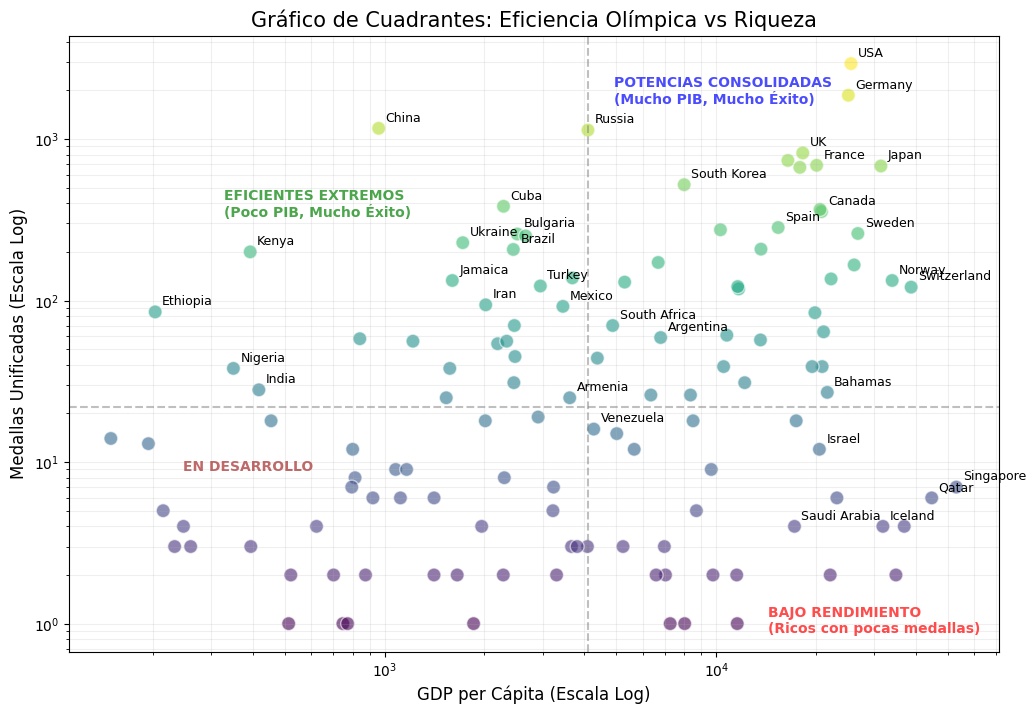

In [49]:
# Agrupamos por país para tener totales históricos o de un año concreto
df_quadrant = df_points.groupby('Country').agg({
    'total_points': 'sum',      # Medallas unificadas por evento
    'GDP_Capita': 'median'       # GDP mediano histórico
}).reset_index()

# Filtramos países con 0 medallas o sin GDP para evitar errores en logaritmo
df_quadrant = df_quadrant[(df_quadrant['total_points'] > 0) & (df_quadrant['GDP_Capita'] > 0)]

# Configurar el gráfico
plt.figure(figsize=(12, 8))
x = df_quadrant['GDP_Capita']
y = df_quadrant['total_points']

# Dibujar el Scatter Plot con escala logarítmica
plt.scatter(x, y, alpha=0.6, edgecolors='w', s=100, c=np.log10(y), cmap='viridis')

# Transformar ejes a escala logarítmica
plt.xscale('log')
plt.yscale('log')

# Definir las líneas del cuadrante (usamos la mediana para que sea más equilibrado)
mid_x = np.median(x)
mid_y = np.median(y)

plt.axvline(mid_x, color='gray', linestyle='--', alpha=0.5)
plt.axhline(mid_y, color='gray', linestyle='--', alpha=0.5)

# Añadir etiquetas a los países más representativos de cada cuadrante
labels = ["USA","Germany","China","UK","France","Japan","Qatar","South Korea","Norway","Switzerland","Venezuela","Armenia","Canada","Nigeria","India","Turkey","Sweden","South Africa","Argentina","Spain","Bahamas","Cuba","Russia","Cuba","Bulgaria","Brazil","Ukraine","Jamaica","Iran","Mexico","Kenya","Ethiopia","Israel","Saudi Arabia","Iceland","Singapore"] 

top_labels = df_quadrant[df_quadrant['Country'].isin(labels)]

# top_labels = df_quadrant[(df_quadrant['total_points'] > mid_y*2) | (df_quadrant['GDP_Capita'] > mid_x*2)]

for i, row in top_labels.iterrows():
    plt.annotate(row['Country'], (row['GDP_Capita'], row['total_points']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# Anotaciones de los Cuadrantes
plt.text(mid_x * 0.08, mid_y * 15, "EFICIENTES EXTREMOS\n(Poco PIB, Mucho Éxito)", 
         color='green', fontweight='bold', alpha=0.7)
plt.text(mid_x * 1.2, mid_y * 75, "POTENCIAS CONSOLIDADAS\n(Mucho PIB, Mucho Éxito)", 
         color='blue', fontweight='bold', alpha=0.7)
plt.text(mid_x * 0.06, mid_y * 0.4, "EN DESARROLLO", 
         color='brown', fontweight='bold', alpha=0.7)
plt.text(mid_x * 3.5, mid_y * 0.04, "BAJO RENDIMIENTO\n(Ricos con pocas medallas)", 
         color='red', fontweight='bold', alpha=0.7)

plt.title('Gráfico de Cuadrantes: Eficiencia Olímpica vs Riqueza', fontsize=15)
plt.xlabel('GDP per Cápita (Escala Log)', fontsize=12)
plt.ylabel('Medallas Unificadas (Escala Log)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.savefig("img/eficiencia.png");
plt.show()


En este gráfico podemos comparar muy visualmente el éxito deportivo histórico nfrente a la capacidad económica (PIB per cápita).
Por un lado vemos que a medida que nos movemos hacia la derecha (países más "ricos"), algunos puntos tienden a subir. Esto indica que el dinero ayuda a financiar la infraestructura deportiva, pero la cultura deportiva y las políticas de estado y sus prioridades son determinantes.

El gráfico se divide en 4 cuadrantes con perfiles bastante claros:
    - Potencias consolidadas: EEUU, Alemania o Francia tienen buena financiación y cultura del deporte. Son los dominadores históricos del medallero y la mayoría de las potencias del medallero estan aquí.
    - Eficientes extremos: es un grupo interesante con países com China, Kenia, Etiopía o Jamaica, que logran grandes resultados a pesar de tener un PIB por cápita relativamente bajo. China es el caso más extremo cómo ya hemos comentado anteriormente gracias a una inversión estatal dirigida. Destacan casos como los países africanos o Jamaica, muy especializados en ciertas disciplinas de atletismo.
    - Bajo rendimiento: són países con gran riqueza pero con pocas medallas, ya sea porque la inversión deportiva es reciente, no hay una base de deportistas de élite consolidada o no hay prioridad política y cultura deportiva de élite.
    - En desarrollo: países con recursos lmitados y poco éxitos olímpicos. Donde se encuentra la base de la mayoría de las naciones del mundo.

En el centro vertical del gráfico podemos identificar países con pasado o presente comunista (Cuba, Bielorússia, Russia o Ucrania), que refleja un legado de sistemas deportivos estatales robustos diseñados durante el siglo XX, donde el éxito olímpico era una prioridad de orgullo nacional.

China es un outlier y un ejemplo de como una gran población y una centralización de recursos puede llevar a un país a competir con las potencia con mas historia y riqueza.

## Ventaja de anfitrión


Parece que organizar un evento como los Juegos Olímpicos es una oportunidad para el país amfitrión para invertir, prepararse y buscar el éxito deportivo. Vamos a ver si es una tendencia general, sólo unos casos aislados o si lo es en gran medida o moderadamente.

In [50]:
# Filtramos nuestro dataset completo con las ciudades amfitrionas

olympics_complete[['Year', 'City']].drop_duplicates().sort_values('Year')

Year            City
2676  1896          Athina
3     1900           Paris
629   1904       St. Louis
202   1906          Athina
979   1908          London
10    1912       Stockholm
2     1920       Antwerpen
14    1924           Paris
71    1928       Amsterdam
4     1932     Los Angeles
44    1936          Berlin
15    1948          London
6     1952        Helsinki
66    1956       Melbourne
5458  1956       Stockholm
67    1960            Roma
130   1964           Tokyo
39    1968     Mexico City
40    1972          Munich
83    1976        Montreal
126   1980          Moskva
38    1984     Los Angeles
41    1988           Seoul
0     1992       Barcelona
8     1996         Atlanta
7     2000          Sydney
36    2004          Athina
33    2008         Beijing
1     2012          London
34    2016  Rio de Janeiro

In [51]:
#Parece que hay un error, ya que aparecen 2 países amfitriones en 1956. Vamos a investigar.
olympics_complete.iloc[5458]

ID                                                         3479
Name                            Karl Vilhelm Nordstrm Ammitzbll
Sex                                                           M
Age                                                        40.0
Height                                                    179.0
Weight                                                     74.0
NOC                                                         DEN
Games                                               1956 Summer
Year                                                       1956
Season                                                   Summer
City                                                  Stockholm
Sport                                             Equestrianism
Event           Equestrianism Men's Three-Day Event, Individual
Medal                                                       NoM
Country                                                 Denmark
Has_Medal                               

In [52]:
olympics_complete.loc[(olympics_complete["Year"] == 1956) & (olympics_complete["Sport"] == "Equestrianism")]

ID                                       Name Sex   Age  Height  \
5458      3479            Karl Vilhelm Nordstrm Ammitzbll   M  40.0   179.0   
5459      3479            Karl Vilhelm Nordstrm Ammitzbll   M  40.0   179.0   
5854      3728                    Hans Christian Andersen   M  42.0   179.0   
5855      3728                    Hans Christian Andersen   M  42.0   179.0   
7187      4608  Kaarlo Erkki Kustavi Anttinen (Andersin-)   M  41.0   180.0   
...        ...                                        ...  ..   ...     ...   
215052  130999                         Hans Gnter Winkler   M  29.0   174.0   
219748  133796                         Mohamed Selim Zaki   M  31.0   179.0   
219749  133796                         Mohamed Selim Zaki   M  31.0   179.0   
221881  135175                              Hermann Zobel   M  47.0   179.0   
221882  135175                              Hermann Zobel   M  47.0   179.0   

        Weight  NOC        Games  Year  Season       City          Sport  \
5458      74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
5459      74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
5854      74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
5855      74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
7187      77.0  FIN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
...        ...  ...          ...   ...     ...        ...            ...   
215052    72.0  GER  1956 Summer  1956  Summer  Stockholm  Equestrianism   
219748    74.0  EGY  1956 Summer  1956  Summer  Stockholm  Equestrianism   
219749    74.0  EGY  1956 Summer  1956  Summer  Stockholm  Equestrianism   
221881    74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   
221882    74.0  DEN  1956 Summer  1956  Summer  Stockholm  Equestrianism   

                                                  Event Medal  Country  \
5458    Equestrianism Men's Three-Day Event, Individual   NoM  Denmark   
5459          Equestrianism Men's Three-Day Event, Team   NoM  Denmark   
5854    Equestrianism Men's Three-Day Event, Individual   NoM  Denmark   
5855          Equestrianism Men's Three-Day Event, Team   NoM  Denmark   
7187    Equestrianism Men's Three-Day Event, Individual   NoM  Finland   
...                                                 ...   ...      ...   
215052                Equestrianism Mixed Jumping, Team  Gold  Germany   
219748          Equestrianism Mixed Jumping, Individual   NoM    Egypt   
219749                Equestrianism Mixed Jumping, Team   NoM    Egypt   
221881         Equestrianism Mixed Dressage, Individual   NoM  Denmark   
221882               Equestrianism Mixed Dressage, Team   NoM  Denmark   

        Has_Medal  Team_Event Country Code  GDP  Population  
5458            0       False          DNK  NaN         NaN  
5459            0       False          DNK  NaN         NaN  
5854            0       False          DNK  NaN         NaN  
5855            0       False          DNK  NaN         NaN  
7187            0       False          FIN  NaN         NaN  
...           ...         ...          ...  ...         ...  
215052          1        True          DEU  NaN         NaN  
219748          0       False          EGY  NaN         NaN  
219749          0       False          EGY  NaN         NaN  
221881          0       False          DNK  NaN         NaN  
221882          0       False          DNK  NaN         NaN  

[298 rows x 20 columns]

Efectivamente todos los eventos de equitación de la edición de los Juegos de 1956 en Melbourne se celebraron en Suecia. La curiosa razón es que Australia tenía entonces normas de cuarentena de 6 meses para caballos, lo que hacía imposible traer los animales sin retrasar enormemente el programa. Por lo tanto, tendremos en cuenta los dos anfitriones.

In [53]:
GDP

Country Name Country Code  Year           GDP
0             Afghanistan          AFG  1960  5.377778e+08
1                 Albania          ALB  1960           NaN
2                 Algeria          DZA  1960  2.723649e+09
3          American Samoa          ASM  1960           NaN
4                 Andorra          AND  1960           NaN
...                   ...          ...   ...           ...
12478  Virgin Islands, US          VIR  2016           NaN
12479           Palestine          PSE  2016  1.339710e+10
12480               Yemen          YEM  2016  2.731761e+10
12481              Zambia          ZMB  2016  2.106399e+10
12482            Zimbabwe          ZWE  2016  1.661996e+10

[12483 rows x 4 columns]

In [54]:
#Reemplazamos los nombres con faltas ortográficas

olympics_complete["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21776\1663316475.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics_complete["City"].replace(["Athina","Moskva"],["Athens", "Moscow"], inplace = True)


In [55]:
# Queremos jugar con la columna de países y una de país amfitrión. Por eso asociamos cada ciudad a su país.

city_to_country = {'Tokyo': 'Japan',
                   'Paris': 'France',
                   'St. Louis': 'USA',
                   'Stockholm': 'Sweden',
                   'Antwerpen':'Belgium',
                   'Amsterdam': 'Netherlands',
                   'Berlin': 'Germany',
                   'Helsinki': 'Finland',
                   'Melbourne': 'Australia',
                   'Roma': 'Italy',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}

# Generamos la columna de país amfitrión con un mapeo
olympics_complete['Country_Host'] = olympics_complete['City'].map(city_to_country)

hosts = olympics_complete.loc[:, ['Year', 'Country_Host']].drop_duplicates().rename(columns={'Country_Host': 'Country'})

In [56]:
# Filtramos lo países que ganaron alguna medalla en algun evento

medals_by_country_year = (
    medals_tally
    .loc[:, ['Year', 'Country', 'Medal_count']]
    .sort_values(['Country', 'Year'])
)

In [57]:
medals_by_country_year

Year      Country  Medal_count
13160  2008  Afghanistan            1
14117  2012  Afghanistan            1
8231   1984      Algeria            1
8232   1984      Algeria            1
9654   1992      Algeria            1
...     ...          ...          ...
13159  2004     Zimbabwe            1
14113  2008     Zimbabwe            1
14114  2008     Zimbabwe            1
14115  2008     Zimbabwe            1
14116  2008     Zimbabwe            1

[16052 rows x 3 columns]

In [58]:
# Fusionamos el medallero de cada país y año con el de los países amfitriones. Solo obtenemos las medallas de los países amfitriones el año de su celebración

host_medals = hosts.merge(
    medals_by_country_year,
    on=['Year', 'Country'],
    how='left'
).rename(columns={'Medal_count': 'Host_medals'})

host_medals = (host_medals.groupby(['Country', 'Year'], as_index=False)['Host_medals'].sum().sort_values(['Country', 'Year']))

In [59]:
host_medals

Country  Year  Host_medals
0     Australia  1956           35
1     Australia  2000           58
2       Belgium  1920           42
3        Brazil  2016           19
4        Canada  1976           11
5         China  2008          100
6       Finland  1952           22
7        France  1900          102
8        France  1924           40
9       Germany  1936          101
10      Germany  1972          106
11       Greece  1896           44
12       Greece  1906           35
13       Greece  2004           16
14        Italy  1960           36
15        Japan  1964           29
16       Mexico  1968            9
17  Netherlands  1928           23
18       Russia  1980          195
19  South Korea  1988           33
20        Spain  1992           22
21       Sweden  1912           65
22       Sweden  1956           19
23           UK  1908          143
24           UK  1948           27
25           UK  2012           65
26          USA  1904          230
27          USA  1932          110
28          USA  1984          173
29          USA  1996          101

In [60]:
# Generamos un contador de medallas por país y año
country_year_medals = (
    medals_tally
    .groupby(['Country', 'Year'], as_index=False)
    ['Medal_count']
    .sum()
    .sort_values(['Country', 'Year'])
)

In [61]:
# Generamos nueva columna que indica cuántas medallas ganaron en el evento anterior (shift mueve fila)
country_year_medals['Prev_medals'] = (
    country_year_medals
    .groupby('Country')['Medal_count']
    .shift(1)
)

# Generamos nueva columna que indica cuántas medallas ganaron en el evento siguiente
country_year_medals['Next_medals'] = (
    country_year_medals
    .groupby('Country')['Medal_count']
    .shift(-1)
)

In [62]:
country_year_medals

Country  Year  Medal_count  Prev_medals  Next_medals
0     Afghanistan  2008            1          NaN          1.0
1     Afghanistan  2012            1          1.0          NaN
2         Algeria  1984            2          NaN          2.0
3         Algeria  1992            2          2.0          3.0
4         Algeria  1996            3          2.0          5.0
...           ...   ...          ...          ...          ...
1263       Zambia  1984            1          NaN          1.0
1264       Zambia  1996            1          1.0          NaN
1265     Zimbabwe  1980            1          NaN          3.0
1266     Zimbabwe  2004            3          1.0          4.0
1267     Zimbabwe  2008            4          3.0          NaN

[1268 rows x 5 columns]

Podemos observar que en todas las ediciones excepto dos, el amfitrión tuvo un notable incremento en su medallero. Normalmente los países amfitriones invierten y preparan sus delegaciones para hacer un buen papel en la edición que organizan. Normalmente el país anfitrión tiene 8 años de antelación, por lo que una buena planificación puede suponer una gran diferencia. 
Vemos los picos ya comentados de St. Louis en 1904, el de Alemania de 1936 y los boicots mutuos de EEUU y Rusia en 1980 y 1984.

Aunque en promedio se observa una ventaja del país anfitrión, existen excepciones notables. En 1956, Australia registró una ventaja negativa debido a una fuerte tendencia ascendente que culminó en 1960. De forma similar, Canadá en 1976 obtuvo un rendimiento inferior a su nivel posterior, lo que se traduce en una ventaja negativa según nuestra definición.

In [63]:
# Por último, fusionamos la última tabla con la de los amfitriones, para tener sólo sus valores
host_medals = host_medals.merge(
    country_year_medals[['Year', 'Country', 'Prev_medals', 'Next_medals']],
    on=['Year', 'Country'],
    how='left'
)

In [64]:
host_medals

Country  Year  Host_medals  Prev_medals  Next_medals
0     Australia  1956           35         11.0         22.0
1     Australia  2000           58         41.0         50.0
2       Belgium  1920           42          6.0         13.0
3        Brazil  2016           19         17.0          NaN
4        Canada  1976           11          5.0         44.0
5         China  2008          100         64.0         89.0
6       Finland  1952           22         22.0         15.0
7        France  1900          102         11.0          2.0
8        France  1924           40         42.0         25.0
9       Germany  1936          101         24.0         24.0
10      Germany  1972          106         51.0        129.0
11       Greece  1896           44          NaN          2.0
12       Greece  1906           35          2.0          4.0
13       Greece  2004           16         13.0          4.0
14        Italy  1960           36         25.0         27.0
15        Japan  1964           29         18.0         25.0
16       Mexico  1968            9          1.0          1.0
17  Netherlands  1928           23         11.0          8.0
18       Russia  1980          195        125.0        131.0
19  South Korea  1988           33         19.0         28.0
20        Spain  1992           22          4.0         17.0
21       Sweden  1912           65         25.0         64.0
22       Sweden  1956           19         35.0          6.0
23           UK  1908          143         25.0         41.0
24           UK  1948           27         14.0         11.0
25           UK  2012           65         48.0         67.0
26          USA  1904          230         54.0         23.0
27          USA  1932          110         56.0         57.0
28          USA  1984          173         94.0         94.0
29          USA  1996          101        108.0         91.0

In [65]:
# Calculamos la media de las medallas anteriores y posteriores
host_medals['Baseline_medals'] = (
    host_medals[['Prev_medals', 'Next_medals']].mean(axis=1)
)

#Calculamos la diferencia entre las medallas en la edición de organización y la media anterior
host_medals['Home_advantage'] = (
    host_medals['Host_medals'] - host_medals['Baseline_medals']
)

In [66]:
host_medals[
    ['Year', 'Country', 'Prev_medals', 'Host_medals', 'Next_medals', 'Home_advantage']
].sort_values('Year')

Year      Country  Prev_medals  Host_medals  Next_medals  Home_advantage
11  1896       Greece          NaN           44          2.0            42.0
7   1900       France         11.0          102          2.0            95.5
26  1904          USA         54.0          230         23.0           191.5
12  1906       Greece          2.0           35          4.0            32.0
23  1908           UK         25.0          143         41.0           110.0
21  1912       Sweden         25.0           65         64.0            20.5
2   1920      Belgium          6.0           42         13.0            32.5
8   1924       France         42.0           40         25.0             6.5
17  1928  Netherlands         11.0           23          8.0            13.5
27  1932          USA         56.0          110         57.0            53.5
9   1936      Germany         24.0          101         24.0            77.0
24  1948           UK         14.0           27         11.0            14.5
6   1952      Finland         22.0           22         15.0             3.5
22  1956       Sweden         35.0           19          6.0            -1.5
0   1956    Australia         11.0           35         22.0            18.5
14  1960        Italy         25.0           36         27.0            10.0
15  1964        Japan         18.0           29         25.0             7.5
16  1968       Mexico          1.0            9          1.0             8.0
10  1972      Germany         51.0          106        129.0            16.0
4   1976       Canada          5.0           11         44.0           -13.5
18  1980       Russia        125.0          195        131.0            67.0
28  1984          USA         94.0          173         94.0            79.0
19  1988  South Korea         19.0           33         28.0             9.5
20  1992        Spain          4.0           22         17.0            11.5
29  1996          USA        108.0          101         91.0             1.5
1   2000    Australia         41.0           58         50.0            12.5
13  2004       Greece         13.0           16          4.0             7.5
5   2008        China         64.0          100         89.0            23.5
25  2012           UK         48.0           65         67.0             7.5
3   2016       Brazil         17.0           19          NaN             2.0

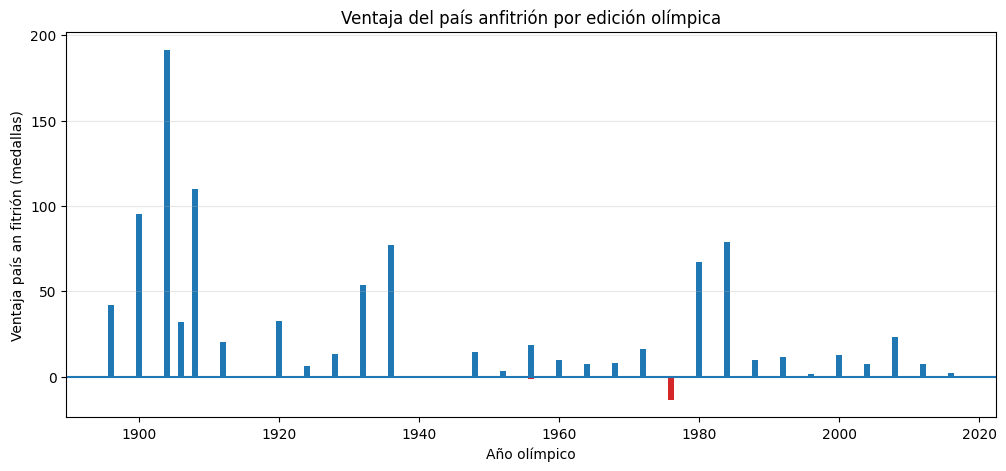

In [67]:
#Graficamos la diferencia de medallas de cada país amfitrión entre la edición de organización y la siguiente/anterior
colors = ['tab:blue' if x > 0 else 'tab:red' for x in host_medals['Home_advantage']]

plt.figure(figsize=(12, 5))
plt.bar(host_medals['Year'], host_medals['Home_advantage'], color=colors)
plt.axhline(0, linewidth=1.5)
plt.xlabel('Año olímpico')
plt.ylabel('Ventaja país an fitrión (medallas)')
plt.title('Ventaja del país anfitrión por edición olímpica')
plt.grid(axis='y', alpha=0.3)
plt.savefig("img/ventaja.png");
plt.show()



---
# ANÁLISIS POR PAÍSES
---

## China

In [68]:
# Partiendo de la 
year_china = year_country.loc[:, ["China"]]

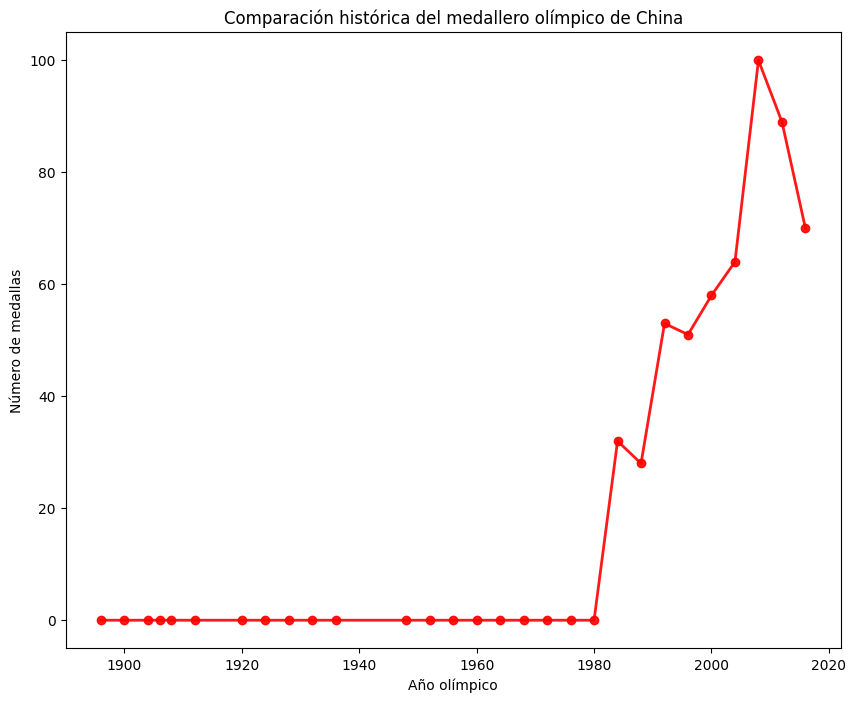

In [69]:
year_china.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2, color = "r", legend = False)
plt.xlabel('Año olímpico')
plt.ylabel('Número de medallas')
plt.title('Comparación histórica del medallero olímpico de China')

plt.savefig("img/Sergi/china.png");

La temprana participación de China en los Juegos Olímpicos se caracterizó por recursos limitados, desafíos políticos y resultados competitivos pobres, pero desempeñó un papel importante en el intercambio internacional y en el desarrollo del deporte chino. Igualmente, su participación no fue regular debido incialmente a la guerra civil china (hasta 1949). Tras la fundación de la República Popular China en 1949, el nuevo gobierno adoptó una postura positiva hacia el Movimiento Olímpico. Sin embargo, las disputas sobre la representación de China llevaron a su exclusión de varios Juegos Olímpicos entre 1956 y 1979.

A partir de Los Angeles 1984 se observa un salto inmediato en el número de medallas, debido a unas políticas estatales de inversión masiva en deporte de alto rendimiento y un sistema centralizado de detección y entrenamiento de talentos.

Entre los años 90 y 2008, la curva muestra un crecimiento constante y acelerado, debibo a la profesionalización del deporte, un enfoque estratégico en disciplinas con muchas medallas y una preparación intensiva para los juegos de Pequín 2008, que culminó con el mayor nombre de oros de la edición.

Desde entonces, se observa una ligera caída, aunque manteniéndose en niveles históricamente altos.

## Alemania 



La trayectoria olímpica de Alemania constituye un caso de estudio singular, en el que el rendimiento deportivo está estrechamente vinculado a los acontecimientos políticos del siglo XX. A lo largo de su historia olímpica, Alemania experimenta periodos de consolidación, exclusión, división y reunificación, reflejando cómo los cambios geopolíticos influyen directamente en la participación y el medallero olímpico.

In [70]:
jjoo["Country"].value_counts().loc[
    jjoo["Country"].value_counts().index.str.contains("Germany")
]

Country
Germany    12377
Name: count, dtype: int64

In [71]:
germany = jjoo[jjoo["Country"].isin(
    ["Germany", "East Germany", "West Germany"]
)].copy()

In [72]:
def germany_period(row):
    if row["Country"] == "Germany" and row["Year"] <= 1912:
        return "Imperial Germany"
    elif row["Country"] == "Germany" and row["Year"] == 1936:
        return "Nazi Germany"
    elif row["Country"] in ["East Germany", "West Germany"]:
        return "Divided Germany"
    elif row["Country"] == "Germany" and row["Year"] >= 1992:
        return "Reunified Germany"
    else:
        return "Other"

germany["Historical_Period"] = germany.apply(germany_period, axis=1)

## Evolución histórica global de Alemania

### Participacion de Atletas (Alemania Total)

In [73]:
athletes_germany = (
    germany
    .groupby("Year")["ID"]
    .nunique()
)

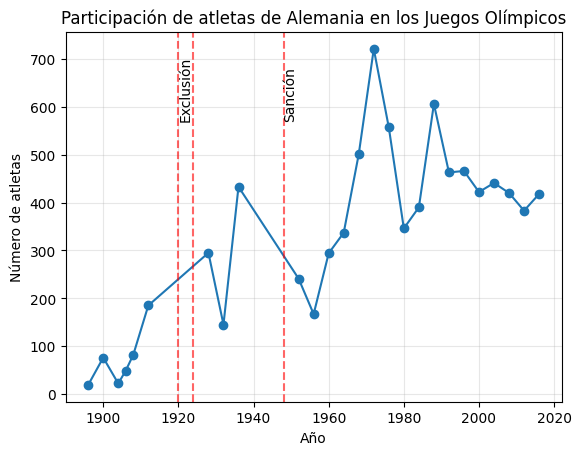

In [74]:
athletes_germany.plot(marker="o")
plt.title("Participación de atletas de Alemania en los Juegos Olímpicos")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)

# Ausencias clave
plt.axvline(1920, linestyle="--", color="red", alpha=0.6)
plt.axvline(1924, linestyle="--", color="red", alpha=0.6)
plt.axvline(1948, linestyle="--", color="red", alpha=0.6)

plt.text(1920, athletes_germany.max()*0.8, "Exclusión", rotation=90)
plt.text(1948, athletes_germany.max()*0.8, "Sanción", rotation=90)

plt.show()

### Medallas Alemanas a lo largo del tiempo

In [75]:
medals_germany = (
    germany[germany["Medal"] != "NoM"]
    .groupby("Year")["Medal"]
    .count()
)

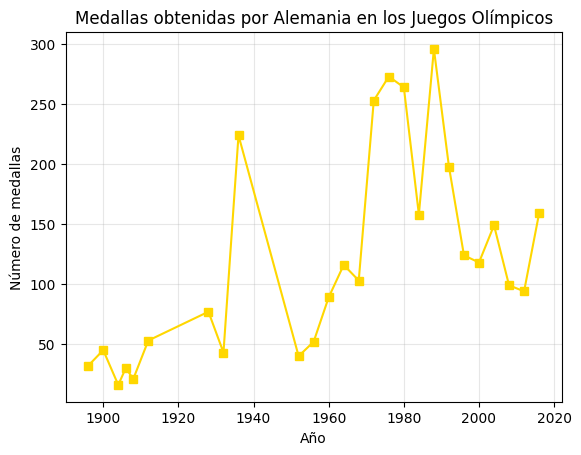

In [76]:
medals_germany.plot(marker="s", color="gold")
plt.title("Medallas obtenidas por Alemania en los Juegos Olímpicos")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

### Alemania dividida (1952–1988)

Hay que recordar que durante este peridod Alemania se encontraba dividida entra la RFA Republica Federal Alemana y la RDA Republica Democratica Alemana

In [77]:
sorted([c for c in jjoo["Country"].dropna().unique() if "Germany" in c])
jjoo["NOC"].value_counts().loc[["GER","GDR","FRG"]] if set(["GER","GDR","FRG"]).issubset(set(jjoo["NOC"].unique())) else "No están los tres NOC"

NOC
GER    7622
GDR    2104
FRG    2558
Name: count, dtype: int64

In [78]:
# Filtramos Alemania dividida por NOC
divided_medals = jjoo[
    (jjoo["Year"].between(1952, 1988)) &
    (jjoo["NOC"].isin(["FRG", "GDR"])) &
    (jjoo["Medal"] != "NoM")
].copy()

medals_divided = (
    divided_medals
    .groupby(["Year", "NOC"])["Medal"]
    .count()
    .unstack(fill_value=0)
)



In [79]:

medals_divided = medals_divided.apply(pd.to_numeric, errors="coerce").fillna(0)



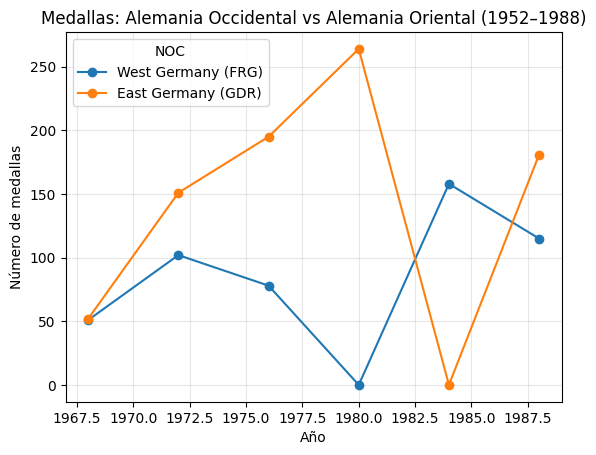

In [80]:
# Plot
medals_divided.rename(columns={"FRG": "West Germany (FRG)", "GDR": "East Germany (GDR)"}).plot(marker="o")
plt.title("Medallas: Alemania Occidental vs Alemania Oriental (1952–1988)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

### Participación (atletas únicos): FRG vs GDR (1952–1988)

In [81]:
divided_athletes = jjoo[
    (jjoo["Year"].between(1952, 1988)) &
    (jjoo["NOC"].isin(["FRG", "GDR"]))
].copy()

In [82]:
athletes_divided = (
    divided_athletes
    .groupby(["Year", "NOC"])["ID"]
    .nunique()
    .unstack(fill_value=0)
)

In [83]:
athletes_divided = athletes_divided.apply(pd.to_numeric, errors="coerce").fillna(0)

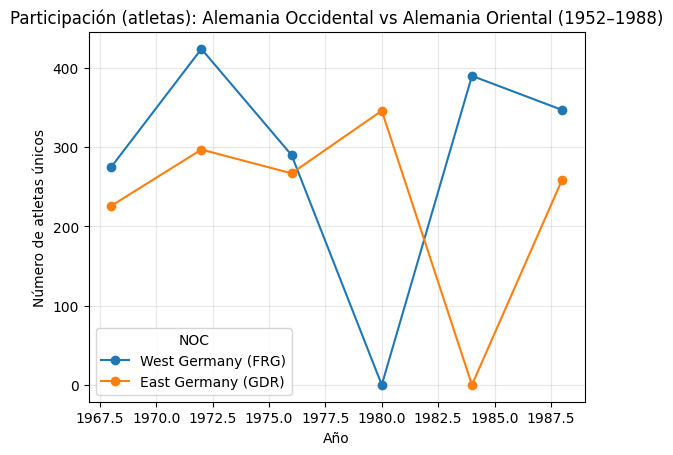

In [84]:
athletes_divided.rename(columns={"FRG": "West Germany (FRG)", "GDR": "East Germany (GDR)"}).plot(marker="o")
plt.title("Participación (atletas): Alemania Occidental vs Alemania Oriental (1952–1988)")
plt.xlabel("Año")
plt.ylabel("Número de atletas únicos")
plt.grid(alpha=0.3)
plt.show()

#### Eficiencia: medallas por atleta

In [85]:
# Alineamos índices por si en algún año falta una serie
efficiency = medals_divided.div(athletes_divided.replace(0, pd.NA))

In [86]:
common_years = medals_divided.index.intersection(athletes_divided.index)
m = medals_divided.loc[common_years].copy()
a = athletes_divided.loc[common_years].copy()

In [87]:
m = m.astype(float)
a = a.astype(float).replace(0, np.nan)

In [88]:
efficiency = m / a

In [89]:
efficiency = efficiency.dropna(how="all")

In [90]:
print(efficiency.dtypes)
display(efficiency.head())

NOC
FRG    float64
GDR    float64
dtype: object


NOC        FRG       GDR
Year                    
1968  0.185455  0.230088
1972  0.240566  0.508418
1976  0.268966  0.730337
1980       NaN  0.763006
1984  0.405128       NaN

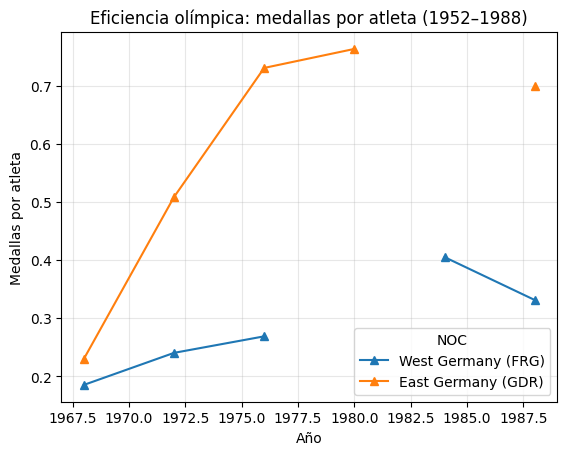

In [91]:
efficiency.rename(columns={"FRG": "West Germany (FRG)", "GDR": "East Germany (GDR)"}).plot(marker="^")
plt.title("Eficiencia olímpica: medallas por atleta (1952–1988)")
plt.xlabel("Año")
plt.ylabel("Medallas por atleta")
plt.grid(alpha=0.3)
plt.show()

La serie presenta discontinuidades porque no todas las ediciones incluyen participación comparable de RFA (FRG) y RDA (GDR), especialmente en años afectados por boicots (1980 y 1984) o ausencias puntuales. Aun así, el patrón general sugiere una mayor eficiencia (medallas por atleta) en la RDA, coherente con un modelo deportivo altamente orientado al rendimiento durante la Guerra Fría.
Hay que destacar que la Occidental se ve afectada por el boicot de los 80 en Moscu mientras que la Alemania Oriental se ve muchos mas afectada en los juegos olimpicos del 84, llegando incluso a no participar.

Alemania no desempeñó un papel protagonista en los boicots olímpicos de la década de 1980. Sin embargo, durante el periodo de división, su participación estuvo condicionada por la lógica de bloques de la Guerra Fría. Mientras que la RFA participó de forma parcial o normalizada, la RDA se vio directamente afectada por el boicot del bloque soviético en 1984. Tras la reunificación, Alemania presenta una participación estable y desvinculada de este tipo de conflictos políticos.

En el periodo de Alemania dividida (1952–1988) se observan dinámicas diferenciadas entre la RFA (FRG) y la RDA (GDR). Al analizar participación (atletas) y medallas por edición, se aprecia que la RDA alcanza un rendimiento muy elevado en relación con el tamaño de su delegación, lo que se refleja en una mayor eficiencia (medallas por atleta) en varias ediciones. Este patrón es coherente con un modelo deportivo altamente orientado al rendimiento durante la Guerra Fría

### Alemania reunificada (1992 en adelante)

### Participacion tras la reunificacion

In [92]:
reunified = germany[
    (germany["Country"] == "Germany") &
    (germany["Year"] >= 1992)
]

athletes_reunified = (
    reunified
    .groupby("Year")["ID"]
    .nunique()
)

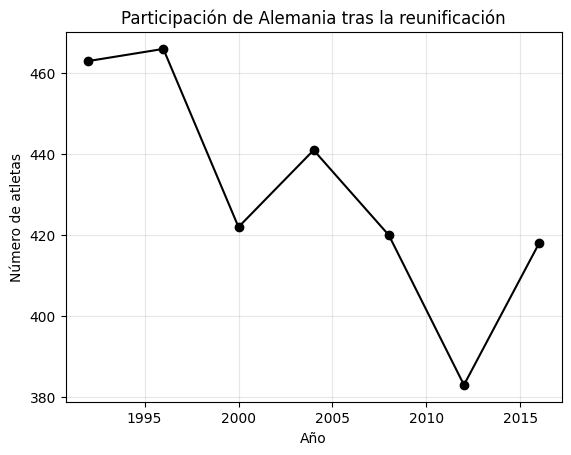

In [93]:
athletes_reunified.plot(marker="o", color="black")
plt.title("Participación de Alemania tras la reunificación")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

### Medallas tras la reunificacion

In [94]:
medals_reunified = (
    reunified[reunified["Medal"] != "NoM"]
    .groupby("Year")["Medal"]
    .count()
)

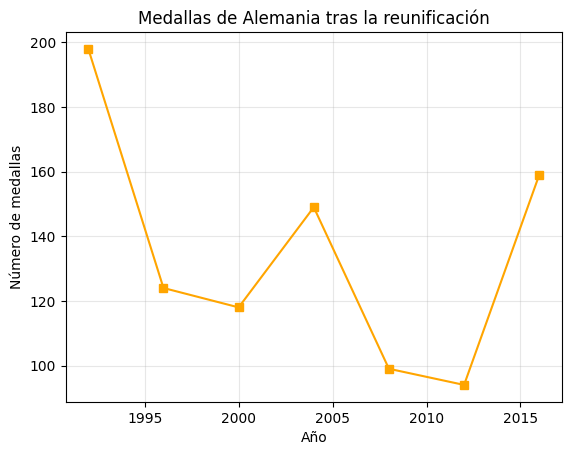

In [95]:
medals_reunified.plot(marker="s", color="orange")
plt.title("Medallas de Alemania tras la reunificación")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

In [96]:
# Alemania reunificada (desde 1992)
germany_reunified = jjoo[
    (jjoo["NOC"] == "GER") &
    (jjoo["Year"] >= 1992)
].copy()

# Participación (atletas únicos)
athletes_reunified = (
    germany_reunified
    .groupby("Year")["ID"]
    .nunique()
)

# Medallas
medals_reunified = (
    germany_reunified[germany_reunified["Medal"] != "NoM"]
    .groupby("Year")["Medal"]
    .count()
)

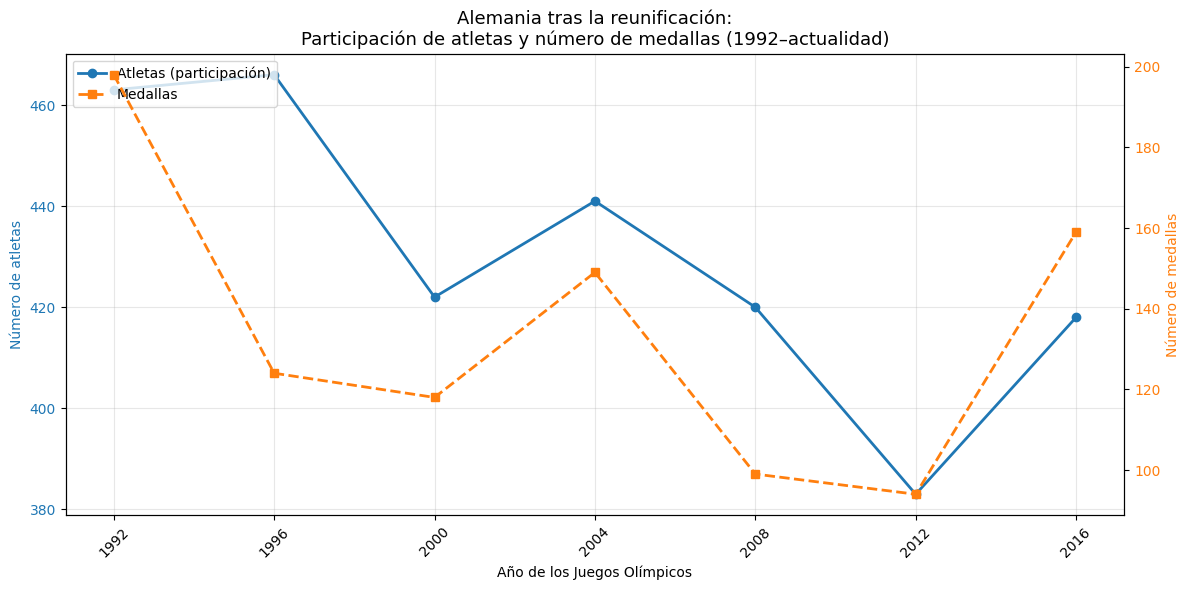

In [97]:
fig, ax1 = plt.subplots(figsize=(12,6))

# --- Participación ---
ax1.plot(
    athletes_reunified.index,
    athletes_reunified.values,
    marker="o",
    linewidth=2,
    label="Atletas (participación)",
    color="tab:blue"
)
ax1.set_xlabel("Año de los Juegos Olímpicos")
ax1.set_ylabel("Número de atletas", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticks(athletes_reunified.index)
ax1.set_xticklabels(athletes_reunified.index, rotation=45)
ax1.grid(alpha=0.3)

# --- Medallas ---
ax2 = ax1.twinx()
ax2.plot(
    medals_reunified.index,
    medals_reunified.values,
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Medallas",
    color="tab:orange"
)
ax2.set_ylabel("Número de medallas", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# --- Título ---
plt.title(
    "Alemania tras la reunificación:\n"
    "Participación de atletas y número de medallas (1992–actualidad)",
    fontsize=13
)

# --- Leyenda combinada ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

El gráfico muestra la evolución de la participación y el número de medallas de Alemania tras la reunificación. Se observa una presencia constante de atletas y un rendimiento competitivo elevado, aunque sin los picos extremos característicos del periodo de Alemania dividida. Este patrón sugiere la consolidación de un modelo deportivo más estable y sostenible, en el que Alemania mantiene su condición de potencia olímpica en el contexto del periodo moderno

In [98]:
# Alemania en todas sus formas
germany_all = jjoo[jjoo["NOC"].isin(["GER", "FRG", "GDR"])].copy()

# Participación (atletas)
athletes_germany_all = (
    germany_all
    .groupby("Year")["ID"]
    .nunique()
)

# Medallas
medals_germany_all = (
    germany_all[germany_all["Medal"] != "NoM"]
    .groupby("Year")["Medal"]
    .count()
)

years = sorted(athletes_germany_all.index)

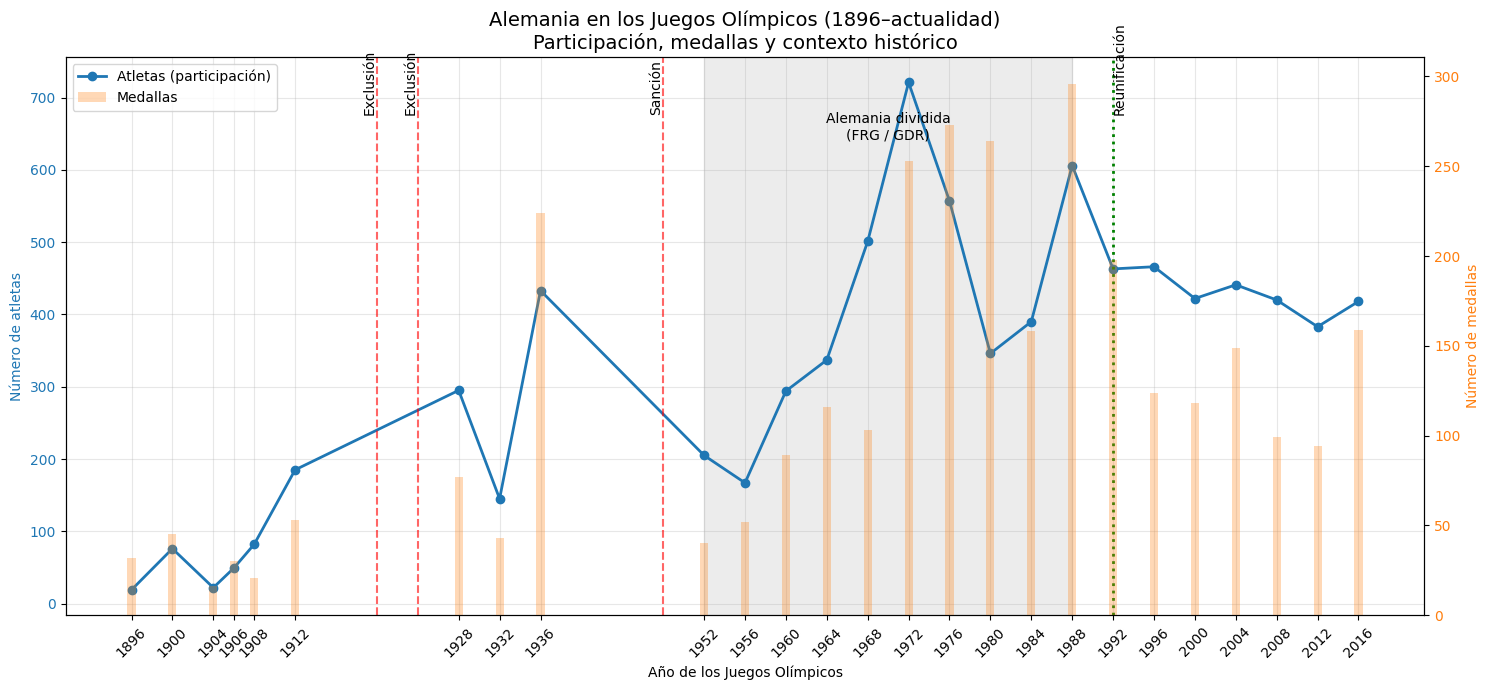

In [99]:
fig, ax1 = plt.subplots(figsize=(15,7))

# ===== PARTICIPACIÓN (ATLETAS) =====
ax1.plot(
    athletes_germany_all.index,
    athletes_germany_all.values,
    marker="o",
    linewidth=2,
    color="tab:blue",
    label="Atletas (participación)"
)

ax1.set_xlabel("Año de los Juegos Olímpicos")
ax1.set_ylabel("Número de atletas", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)
ax1.grid(alpha=0.3)

# ===== MEDALLAS =====
ax2 = ax1.twinx()
ax2.bar(
    medals_germany_all.index,
    medals_germany_all.values,
    alpha=0.3,
    color="tab:orange",
    label="Medallas"
)
ax2.set_ylabel("Número de medallas", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# ===== EVENTOS HISTÓRICOS =====

# Exclusiones tras I GM
for year in [1920, 1924]:
    ax1.axvline(year, color="red", linestyle="--", alpha=0.6)
    ax1.text(year, ax1.get_ylim()[1]*0.9, "Exclusión", rotation=90, ha="right")

# Sanción tras II GM
ax1.axvline(1948, color="red", linestyle="--", alpha=0.6)
ax1.text(1948, ax1.get_ylim()[1]*0.9, "Sanción", rotation=90, ha="right")

# División alemana
ax1.axvspan(1952, 1988, color="grey", alpha=0.15)
ax1.text(1970, ax1.get_ylim()[1]*0.85, "Alemania dividida\n(FRG / GDR)", ha="center")

# Reunificación
ax1.axvline(1992, color="green", linestyle=":", linewidth=2)
ax1.text(1992, ax1.get_ylim()[1]*0.9, "Reunificación", rotation=90, ha="left")

# ===== TÍTULO =====
plt.title(
    "Alemania en los Juegos Olímpicos (1896–actualidad)\n"
    "Participación, medallas y contexto histórico",
    fontsize=14
)

# ===== LEYENDA =====
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

## URSS, Rusia y USA

In [100]:
medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Event", "Medal"]).agg(
    atletas=("Has_Medal","sum"),
    Team_Event=("Team_Event","max")
).reset_index()

medals_tally['Medal_corrected'] = 1
print(f"✅ medals_tally creado: {len(medals_tally):,} medallas")


✅ medals_tally creado: 16,052 medallas


### Filtrado de Países 


In [101]:
# Filtrar DIRECTAMENTE desde jjoo (no desde medals_tally)
# Esto elimina duplicados correctamente

urss = jjoo[
    (jjoo['NOC'] == 'URS') & 
    (jjoo['Year'] >= 1952) & 
    (jjoo['Year'] <= 1988) &
    (jjoo['Has_Medal'] == 1)
].drop_duplicates(subset=['Year', 'NOC', 'Event', 'Medal']).copy()

rus = jjoo[
    (jjoo['NOC'] == 'RUS') & 
    (jjoo['Year'] >= 1996) &
    (jjoo['Has_Medal'] == 1)
].drop_duplicates(subset=['Year', 'NOC', 'Event', 'Medal']).copy()

usa = jjoo[
    (jjoo['NOC'] == 'USA') &
    (jjoo['Has_Medal'] == 1)
].drop_duplicates(subset=['Year', 'NOC', 'Event', 'Medal']).copy()

print(f"✅ URSS: {len(urss):,} medallas")
print(f"✅ Rusia: {len(rus):,} medallas")
print(f"✅ USA: {len(usa):,} medallas")


✅ URSS: 1,005 medallas
✅ Rusia: 452 medallas
✅ USA: 2,544 medallas


### Evolución Temporal URSS (1952-1988)


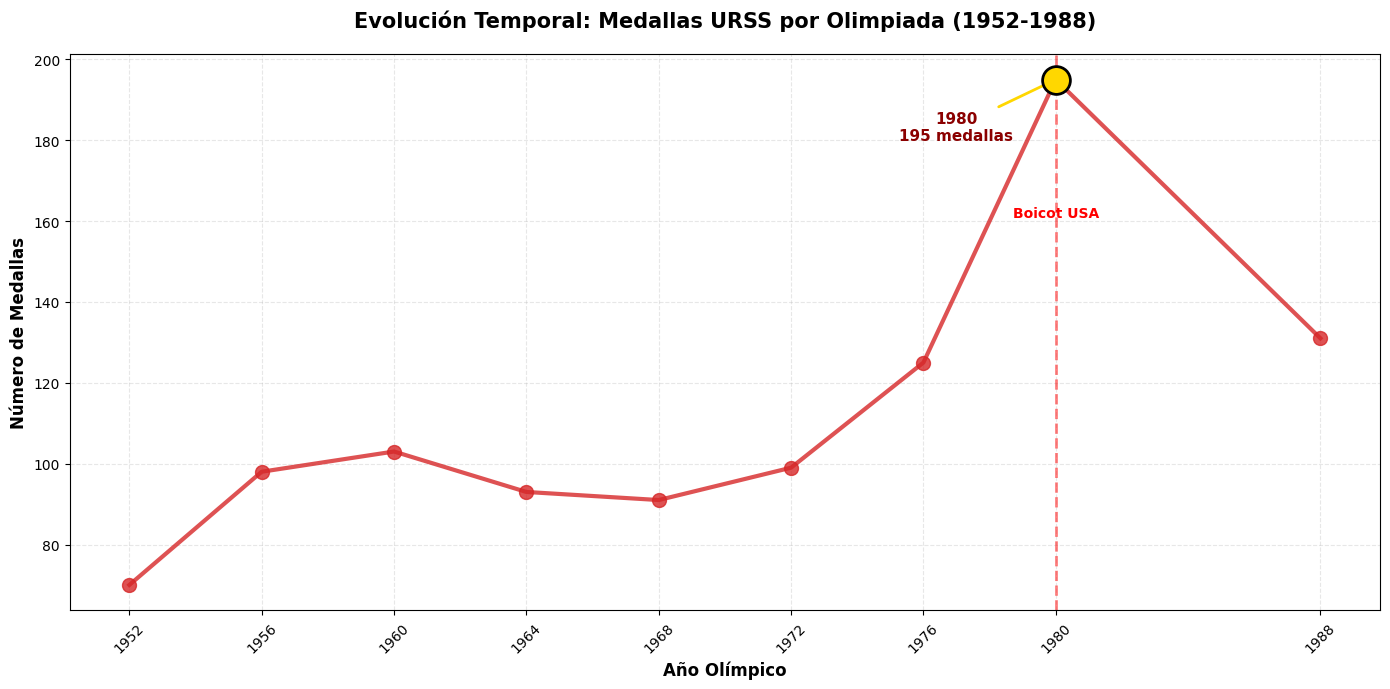

Total: 1,005 medallas | Promedio: 111.7 medallas/olimpiada


In [102]:
medallas_urss_año = urss.groupby('Year').size()

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(medallas_urss_año.index, medallas_urss_año.values, marker='o', linewidth=3, markersize=10, color='#d62728', alpha=0.8)

año_max = medallas_urss_año.idxmax()
valor_max = medallas_urss_año.max()
ax.scatter(año_max, valor_max, color='gold', s=400, zorder=5, edgecolors='black', linewidths=2)
ax.annotate(f'{año_max}\n{valor_max} medallas', xy=(año_max, valor_max), xytext=(año_max -3 , valor_max - 15),
            arrowprops=dict(arrowstyle='->', color='gold', lw=2), fontsize=11, ha='center', fontweight='bold', color='darkred')

if 1980 in medallas_urss_año.index:
    ax.axvline(x=1980, color='red', linestyle='--', linewidth=2, alpha=0.5)
    ax.text(1980, ax.get_ylim()[1] * 0.80, 'Boicot USA', ha='center', fontsize=10, fontweight='bold', color='red')

ax.set_xlabel('Año Olímpico', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Evolución Temporal: Medallas URSS por Olimpiada (1952-1988)', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xticks(medallas_urss_año.index)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig("img/urss.png", dpi=300, bbox_inches="tight")
plt.show()

print(f'Total: {len(urss):,} medallas | Promedio: {medallas_urss_año.mean():.1f} medallas/olimpiada')


### Evolución Temporal USA (1896-2024)


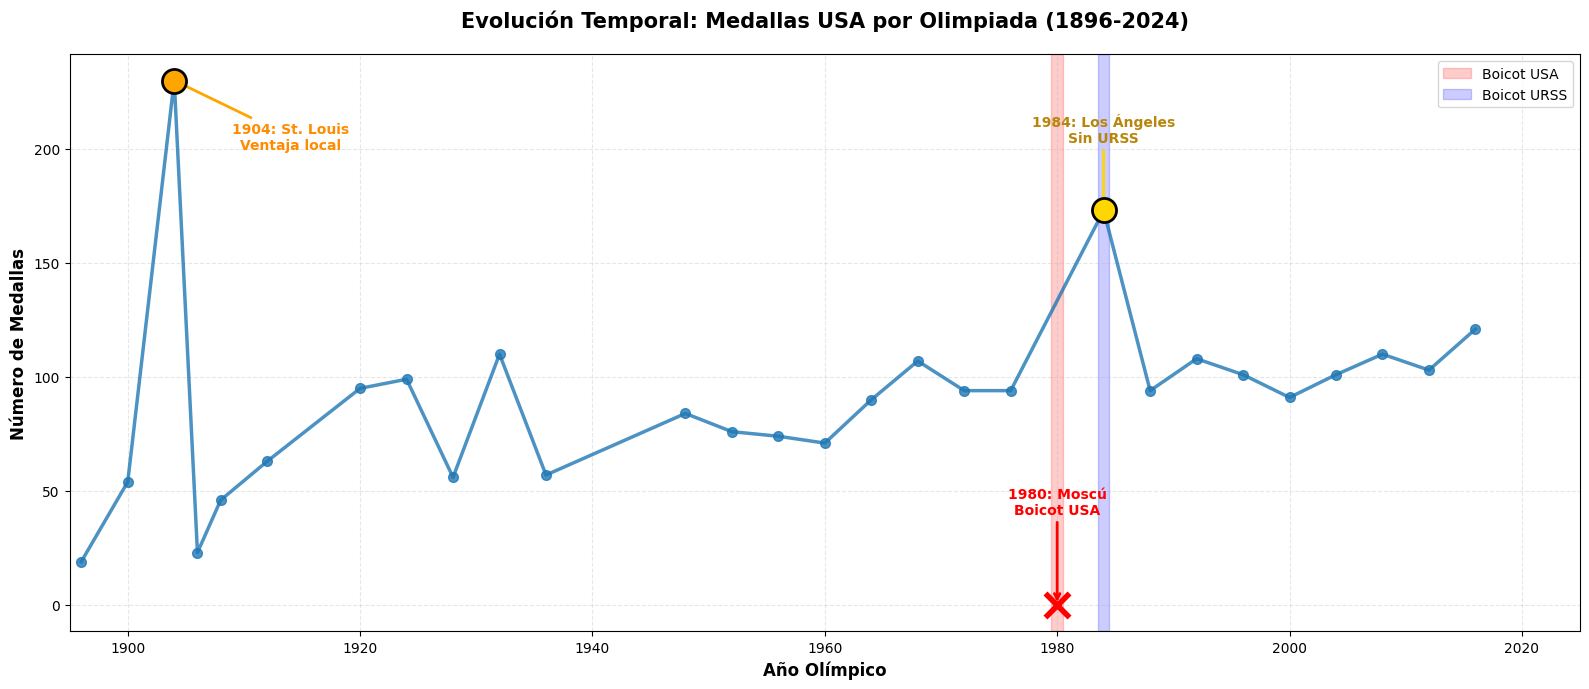

In [103]:
medallas_usa_año = usa.groupby('Year').size()

fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(medallas_usa_año.index, medallas_usa_año.values, marker='o', linewidth=2.5, markersize=7, color='#1f77b4', alpha=0.8)

if 1904 in medallas_usa_año.index:
    ax.scatter(1904, medallas_usa_año[1904], color='orange', s=300, zorder=5, edgecolors='black', linewidths=2)
    ax.annotate('1904: St. Louis\nVentaja local', xy=(1904, medallas_usa_año[1904]), xytext=(1904 +10 , medallas_usa_año[1904] - 30),
                arrowprops=dict(arrowstyle='->', color='orange', lw=2), fontsize=10, ha='center', fontweight='bold', color='darkorange')

ax.scatter(1980, 0, color='red', s=300, marker='x', linewidths=4, zorder=5)
ax.annotate('1980: Moscú\nBoicot USA', xy=(1980, 0), xytext=(1980, 40),
            arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=10, ha='center', fontweight='bold', color='red')

if 1984 in medallas_usa_año.index:
    ax.scatter(1984, medallas_usa_año[1984], color='gold', s=300, zorder=5, edgecolors='black', linewidths=2)
    ax.annotate('1984: Los Ángeles\nSin URSS', xy=(1984, medallas_usa_año[1984]), xytext=(1984, medallas_usa_año[1984] + 30),
                arrowprops=dict(arrowstyle='->', color='gold', lw=2), fontsize=10, ha='center', fontweight='bold', color='darkgoldenrod')

ax.axvspan(1979.5, 1980.5, alpha=0.2, color='red', label='Boicot USA')
ax.axvspan(1983.5, 1984.5, alpha=0.2, color='blue', label='Boicot URSS')

ax.set_xlabel('Año Olímpico', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Evolución Temporal: Medallas USA por Olimpiada (1896-2024)', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=10, loc='upper right')
ax.set_xlim(1895, 2025)
plt.tight_layout()
plt.savefig("img/usa.png", dpi=300, bbox_inches="tight")
plt.show()


### Comparación Promedio URSS vs Rusia


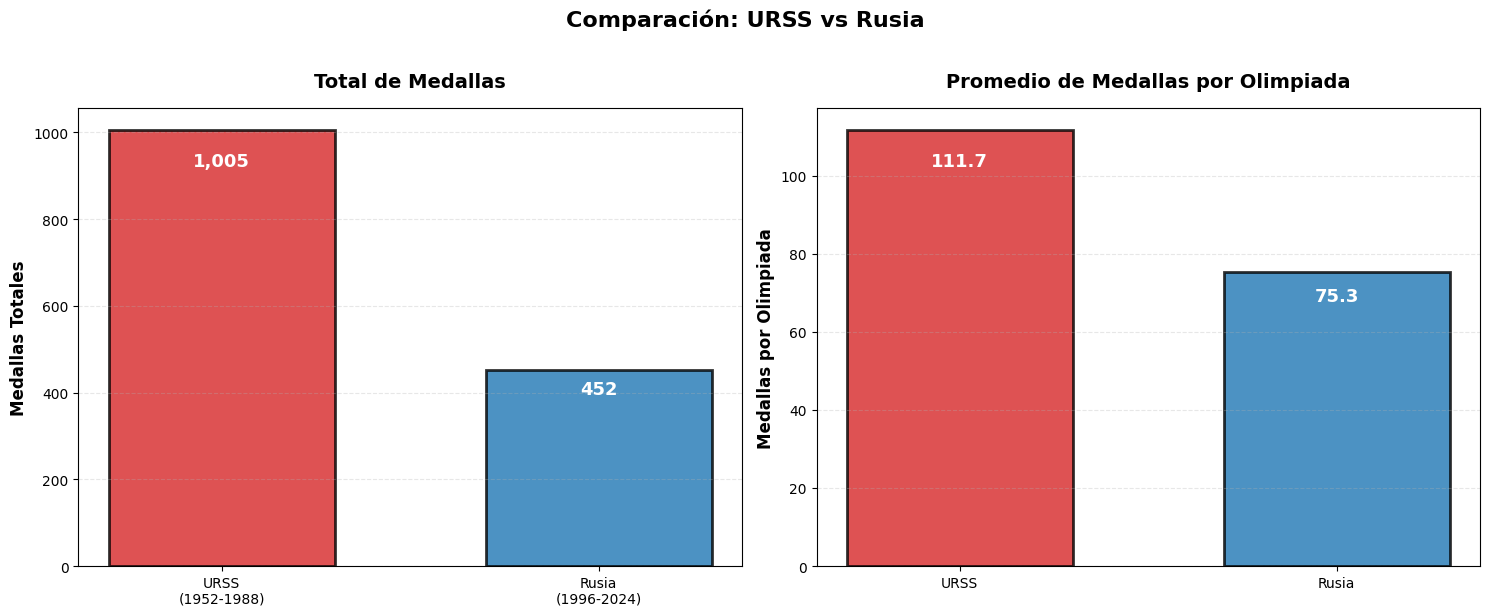

Caída: -32.5% en promedio


In [104]:
medallas_rus_año = rus.groupby('Year').size()
promedio_urss = urss.groupby('Year').size().mean()
promedio_rus = medallas_rus_año.mean()
total_urss = len(urss)
total_rus = len(rus)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Total
bars1 = axes[0].bar(['URSS\n(1952-1988)', 'Rusia\n(1996-2024)'], [total_urss, total_rus], 
                    color=['#d62728', '#1f77b4'], alpha=0.8, edgecolor='black', linewidth=2, width=0.6)
axes[0].set_ylabel('Medallas Totales', fontsize=12, fontweight='bold')
axes[0].set_title('Total de Medallas', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(True, axis='y', alpha=0.3, linestyle='--')
for bar, val in zip(bars1, [total_urss, total_rus]):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 0.95,   # 95% de la altura
        f'{val:,}',
        ha='center',
        va='top',
        fontsize=13,
        fontweight='bold',
        color='white'
    )

# Promedio
bars2 = axes[1].bar(['URSS', 'Rusia'], [promedio_urss, promedio_rus], 
                    color=['#d62728', '#1f77b4'], alpha=0.8, edgecolor='black', linewidth=2, width=0.6)
axes[1].set_ylabel('Medallas por Olimpiada', fontsize=12, fontweight='bold')
axes[1].set_title('Promedio de Medallas por Olimpiada', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(True, axis='y', alpha=0.3, linestyle='--')
for bar, val in zip(bars2, [promedio_urss, promedio_rus]):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() * 0.95,   # 90% de la altura
        f'{val:.1f}',
        ha='center',
        va='top',
        fontsize=13,
        fontweight='bold',
        color='white'
    )

plt.suptitle('Comparación: URSS vs Rusia', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig("img/comparacion.png", dpi=300, bbox_inches="tight")
plt.show()

print(f'Caída: -{((promedio_urss - promedio_rus) / promedio_urss * 100):.1f}% en promedio')


### Top 10 Deportes - URSS vs Rusia


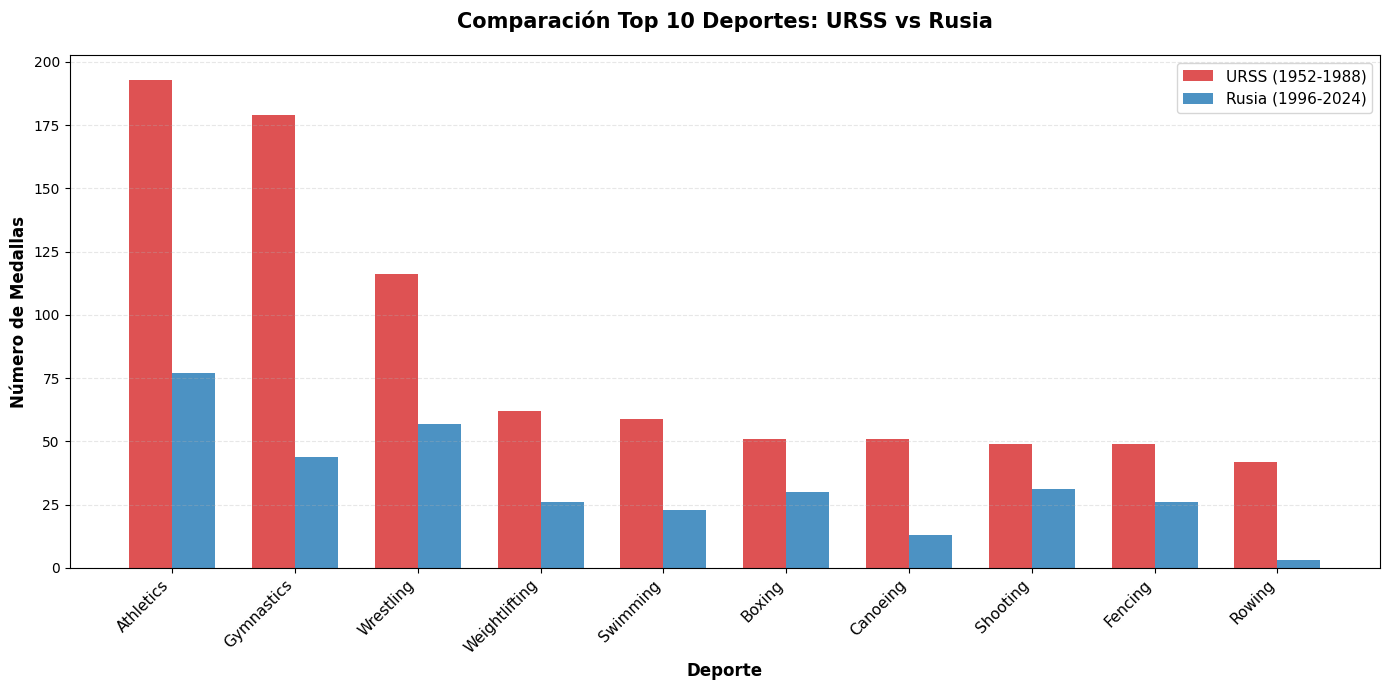

In [105]:
top_deportes_urss = urss.groupby('Sport').size().sort_values(ascending=False).head(10)
deportes_top = top_deportes_urss.index.tolist()
top_deportes_rus = rus[rus['Sport'].isin(deportes_top)].groupby('Sport').size()
top_deportes_rus = top_deportes_rus.reindex(deportes_top, fill_value=0)

fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(deportes_top))
ancho = 0.35

ax.bar(x - ancho/2, top_deportes_urss.values, ancho, label='URSS (1952-1988)', color='#d62728', alpha=0.8)
ax.bar(x + ancho/2, top_deportes_rus.values, ancho, label='Rusia (1996-2024)', color='#1f77b4', alpha=0.8)

ax.set_xlabel('Deporte', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Comparación Top 10 Deportes: URSS vs Rusia', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(deportes_top, rotation=45, ha='right', fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("img/top10urss.png", dpi=300, bbox_inches="tight")
plt.show()


### Top 10 Años con Más Medallas - USA


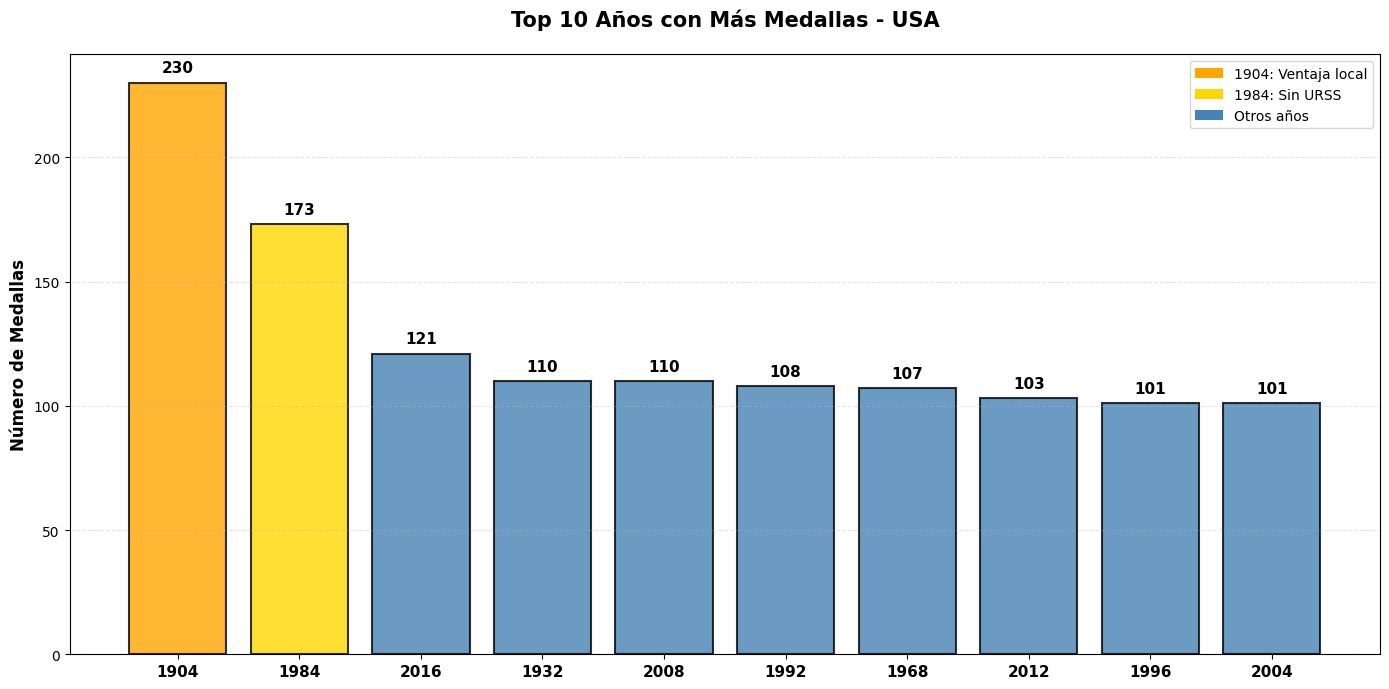

In [106]:
top_10_años = usa.groupby('Year').size().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 7))
colores = ['orange' if año == 1904 else 'gold' if año == 1984 else 'steelblue' for año in top_10_años.index]

ax.bar(range(len(top_10_años)), top_10_años.values, color=colores, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(top_10_años)))
ax.set_xticklabels(top_10_años.index, fontsize=11, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Años con Más Medallas - USA', fontsize=15, fontweight='bold', pad=20)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(top_10_años.values):
    ax.text(i, v + 3, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='orange', label='1904: Ventaja local'),
    Patch(facecolor='gold', label='1984: Sin URSS'),
    Patch(facecolor='steelblue', label='Otros años')
]
ax.legend(handles=legend_elements, fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig("img/top10usa.png", dpi=300, bbox_inches="tight")
plt.show()


### Top 10 Mejores Deportes USA (Histórico)


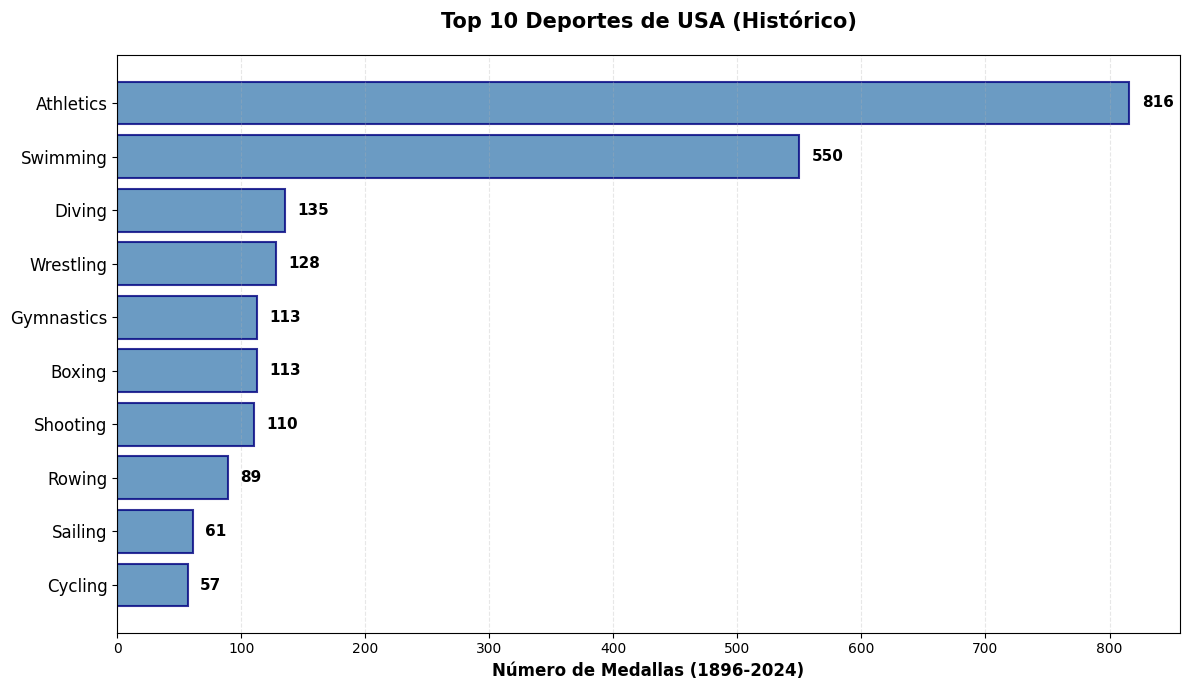

In [107]:
mejores_deportes_usa = usa.groupby('Sport').size().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(range(len(mejores_deportes_usa)), mejores_deportes_usa.values, color='steelblue', alpha=0.8, edgecolor='navy', linewidth=1.5)
ax.set_yticks(range(len(mejores_deportes_usa)))
ax.set_yticklabels(mejores_deportes_usa.index, fontsize=12)
ax.set_xlabel('Número de Medallas (1896-2024)', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Deportes de USA (Histórico)', fontsize=15, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(True, axis='x', alpha=0.3, linestyle='--')

for i, v in enumerate(mejores_deportes_usa.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig("img/top10usa_hist.png", dpi=300, bbox_inches="tight")
plt.show()


### Boicots 1980 y 1984 (Detalle)


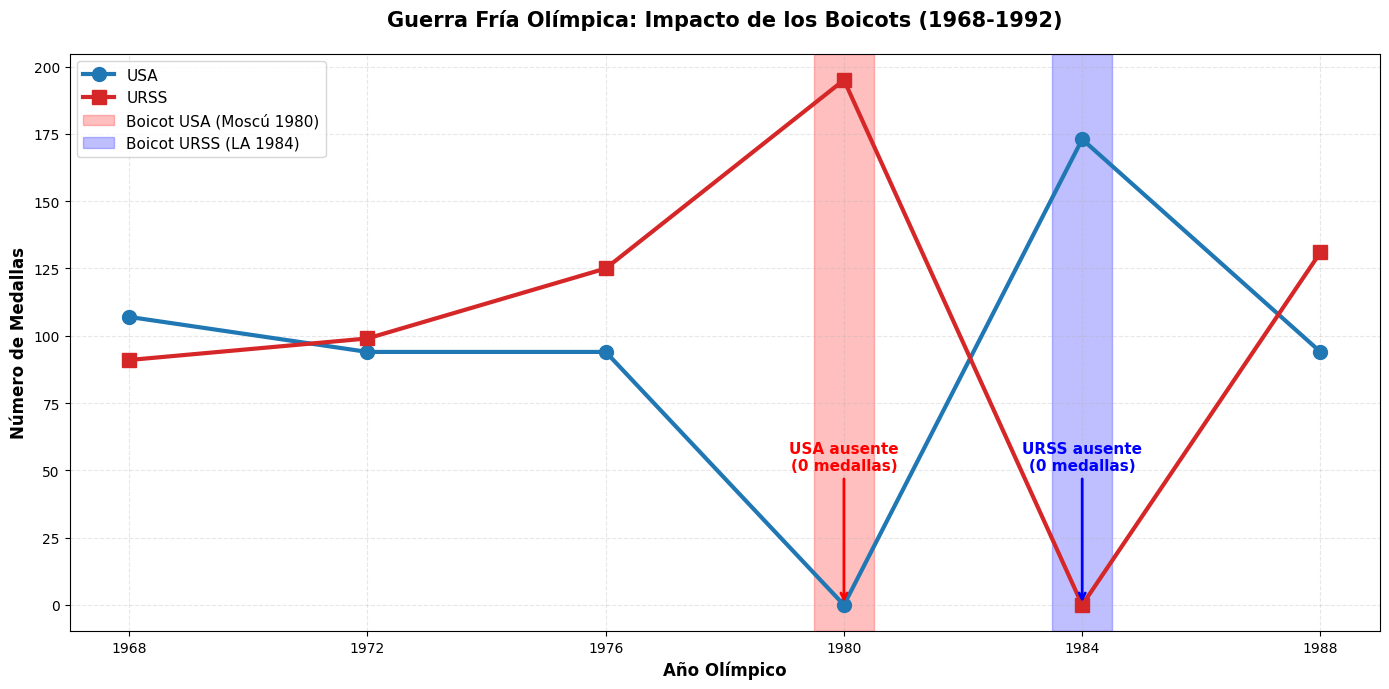

In [108]:
años_comparacion = list(range(1968, 1992, 4))
urss_evolucion = urss[urss['Year'].isin(años_comparacion)]
medallas_urss_años = urss_evolucion.groupby('Year').size().reindex(años_comparacion, fill_value=0)
usa_periodo_urss = usa[(usa['Year'] >= 1952) & (usa['Year'] <= 1988)]
usa_evolucion = usa_periodo_urss[usa_periodo_urss['Year'].isin(años_comparacion)]
medallas_usa_años = usa_evolucion.groupby('Year').size().reindex(años_comparacion, fill_value=0)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(medallas_usa_años.index, medallas_usa_años.values, marker='o', linewidth=3, markersize=10, label='USA', color='#1f77b4')
ax.plot(medallas_urss_años.index, medallas_urss_años.values, marker='s', linewidth=3, markersize=10, label='URSS', color='#d62728')

ax.axvspan(1979.5, 1980.5, alpha=0.25, color='red', label='Boicot USA (Moscú 1980)')
ax.axvspan(1983.5, 1984.5, alpha=0.25, color='blue', label='Boicot URSS (LA 1984)')

ax.annotate('USA ausente\n(0 medallas)', xy=(1980, 0), xytext=(1980, 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=11, ha='center', fontweight='bold', color='red')
ax.annotate('URSS ausente\n(0 medallas)', xy=(1984, 0), xytext=(1984, 50),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2), fontsize=11, ha='center', fontweight='bold', color='blue')

ax.set_xlabel('Año Olímpico', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Guerra Fría Olímpica: Impacto de los Boicots (1968-1992)', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(años_comparacion)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig("img/boicot.png", dpi=300, bbox_inches="tight")
plt.show()


### Comparación URSS vs USA (1952-1988)


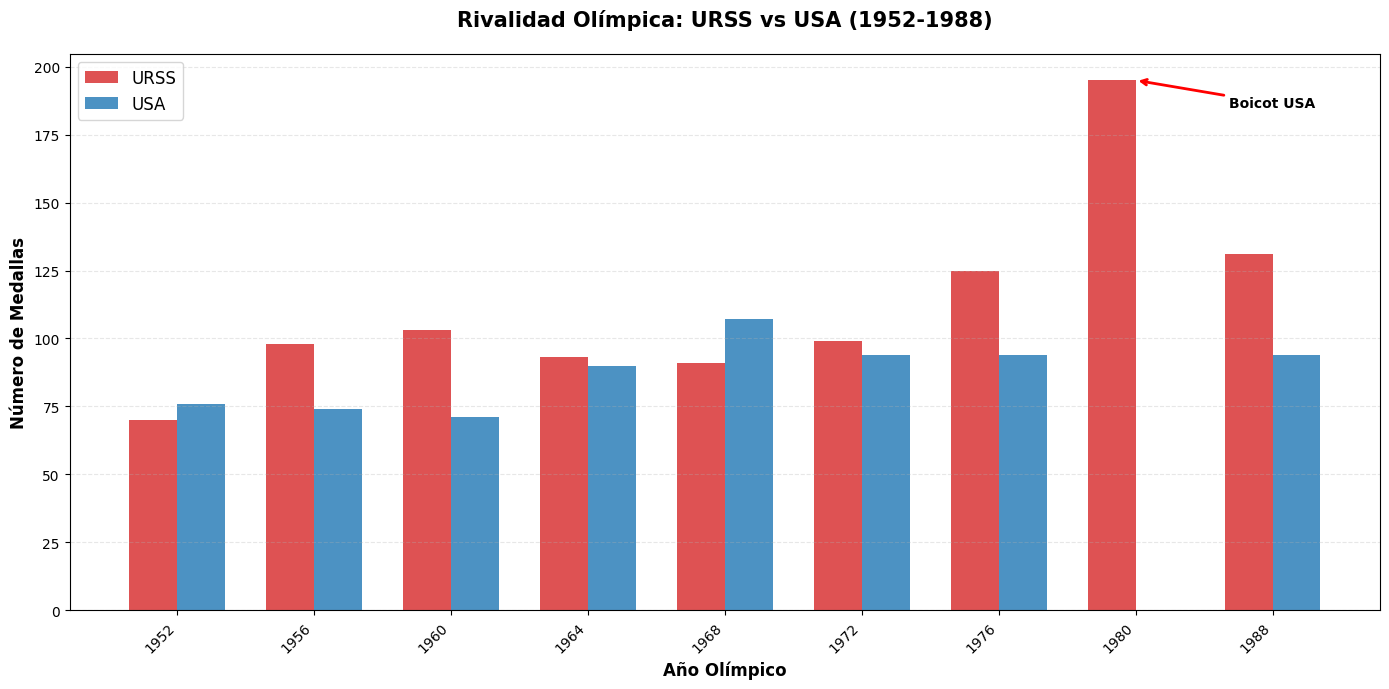

Total URSS: 1,005 | Total USA: 700


In [109]:
años_periodo = sorted(urss['Year'].unique())
medallas_urss_periodo = urss.groupby('Year').size()
medallas_usa_periodo = usa[(usa['Year'] >= 1952) & (usa['Year'] <= 1988)].groupby('Year').size().reindex(años_periodo, fill_value=0)

fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(años_periodo))
ancho = 0.35

ax.bar(x - ancho/2, medallas_urss_periodo.values, ancho, label='URSS', color='#d62728', alpha=0.8)
ax.bar(x + ancho/2, medallas_usa_periodo.values, ancho, label='USA', color='#1f77b4', alpha=0.8)

ax.set_xlabel('Año Olímpico', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de Medallas', fontsize=12, fontweight='bold')
ax.set_title('Rivalidad Olímpica: URSS vs USA (1952-1988)', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(años_periodo, rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, axis='y', alpha=0.3, linestyle='--')

if 1980 in años_periodo:
    idx_1980 = list(años_periodo).index(1980)
    ax.annotate('Boicot USA', xy=(idx_1980, medallas_urss_periodo.iloc[idx_1980]), 
                xytext=(idx_1980 +1 , medallas_urss_periodo.iloc[idx_1980] - 10),
                arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=10, ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig("img/rivalidad.png", dpi=300, bbox_inches="tight")
plt.show()

print(f'Total URSS: {medallas_urss_periodo.sum():,} | Total USA: {medallas_usa_periodo.sum():,}')


---
# ANÁLISIS HISTÓRICO
---

# Evolución de los Juegos Olímpicos por franjas históricas y eventos significativos

Planteamos que los Juegos Olímpicos evolucionan por etapas históricas diferenciadas, definidas por grandes acontecimientos políticos, económicos y sociales. Estas etapas influyen de forma directa en la participación olímpica y en el reparto de medallas, generando patrones distintos en cada periodo

## Periodo temprano de los Juegos Olímpicos (hasta 1912)

El periodo temprano corresponde a las primeras ediciones de los Juegos Olímpicos modernos, caracterizadas por una participación limitada y una estructura organizativa aún en desarrollo. En esta etapa, los Juegos presentan un carácter marcadamente elitista, con predominio de países europeos y de Estados Unidos, y un programa deportivo reducido en comparación con etapas posteriores.

In [110]:
early_period = jjoo[jjoo["Year"] <= 1912]
early_period["Year"].unique()

array([1900, 1912, 1906, 1904, 1908, 1896])

### Participacion Atletas en el periodo temprano.

In [111]:
athletes_early = (
    early_period
    .groupby("Year")["ID"]
    .nunique()
)

athletes_early

Year
1896     176
1900    1224
1904     650
1906     841
1908    2024
1912    2409
Name: ID, dtype: int64

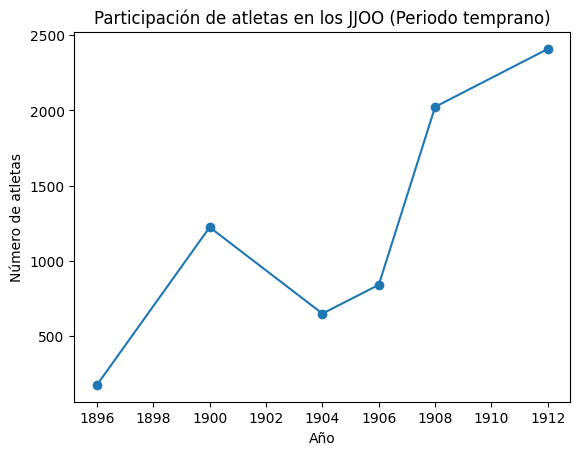

In [112]:


athletes_early.plot(marker="o")
plt.title("Participación de atletas en los JJOO (Periodo temprano)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.show()

### Participacion Paises en el periodo temprano.

In [113]:
countries_early = (
    early_period
    .groupby("Year")["Country"]
    .nunique()
)

countries_early

Year
1896    12
1900    31
1904    14
1906    20
1908    22
1912    29
Name: Country, dtype: int64

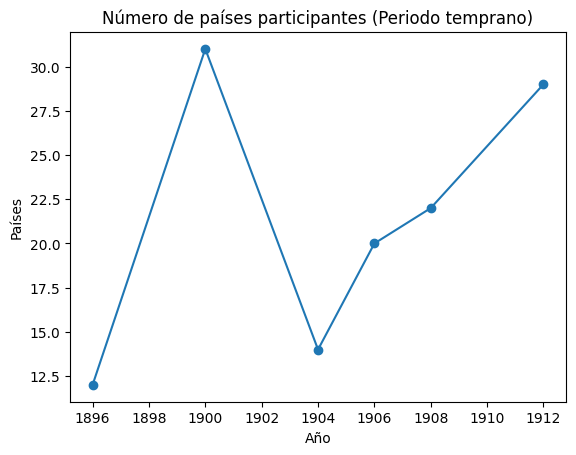

In [114]:
countries_early.plot(marker="o")
plt.title("Número de países participantes (Periodo temprano)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.show()

Observamos como en el año 1904 hubo un descenso pronunciado debido a la localizacion (USA)

### Concentracion del medallero

In [115]:
medals_early = early_period[early_period["Medal"] != "NoM"]

medals_by_country_early = (
    medals_early
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
)

medals_by_country_early.head(10)

Country
UK         696
USA        673
France     378
Sweden     299
Germany    197
Norway     158
Greece     158
Denmark    153
Canada     112
Belgium    106
Name: Medal, dtype: int64

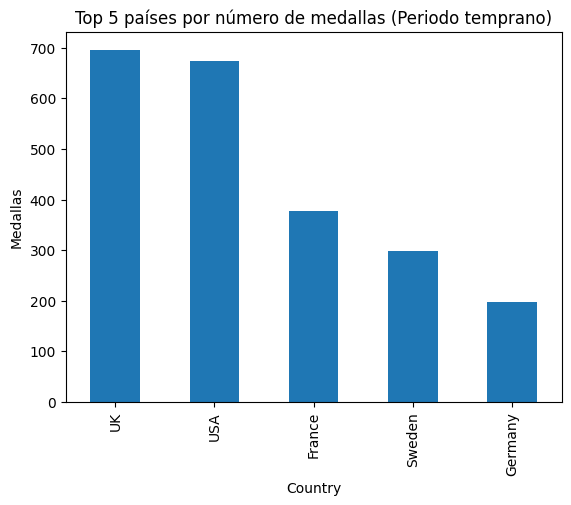

In [116]:


medals_by_country_early.head(5).plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo temprano)")
plt.ylabel("Medallas")
plt.show()

El análisis del periodo temprano muestra que los Juegos Olímpicos presentaban una participación limitada tanto en número de atletas como de países. El medallero se encontraba altamente concentrado en unas pocas naciones, reflejando el carácter elitista y poco globalizado del olimpismo en sus primeras ediciones. Estos patrones concuerdan con el contexto histórico de la época, en la que los Juegos aún no se habían consolidado como un evento deportivo internacional de masas.

## Primera Guerra Mundial (1914-1918)

La Primera Guerra Mundial representa la primera gran interrupción del movimiento olímpico moderno. El evento más significativo de este periodo es la cancelación de los Juegos Olímpicos de 1916, previstos en Berlín, lo que supuso una ruptura total de la continuidad olímpica y evidenció la vulnerabilidad de los Juegos ante los grandes conflictos internacionales.

In [117]:
jjoo[(jjoo["Year"] >= 1914) & (jjoo["Year"] <= 1918)]["Year"].unique()

array([], dtype=int64)

### Participacion Atletas

In [118]:
athletes_1912 = jjoo[jjoo["Year"] == 1912]["ID"].nunique()
athletes_1920 = jjoo[jjoo["Year"] == 1920]["ID"].nunique()

athletes_1912, athletes_1920

(2409, 2676)

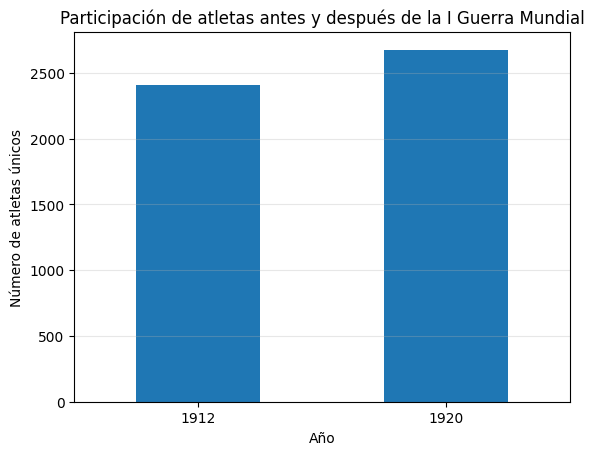

In [119]:
athletes_pre_post = (
    jjoo[jjoo["Year"].isin([1912, 1920])]
    .groupby("Year")["ID"]
    .nunique()
)

athletes_pre_post.plot(kind="bar")
plt.title("Participación de atletas antes y después de la I Guerra Mundial")
plt.ylabel("Número de atletas únicos")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Participacion Paises

In [120]:
countries_1912 = jjoo[jjoo["Year"] == 1912]["Country"].nunique()
countries_1920 = jjoo[jjoo["Year"] == 1920]["Country"].nunique()

countries_1912, countries_1920

(29, 29)

In [121]:
countries_1912_list = set(jjoo[jjoo["Year"] == 1912]["Country"].unique())
countries_1920_list = set(jjoo[jjoo["Year"] == 1920]["Country"].unique())

excluded_countries = countries_1912_list - countries_1920_list
excluded_countries

{'Austria',
 'Germany',
 'Hungary',
 'Iceland',
 'Poland',
 'Russia',
 'Turkey',
 'Unknown'}

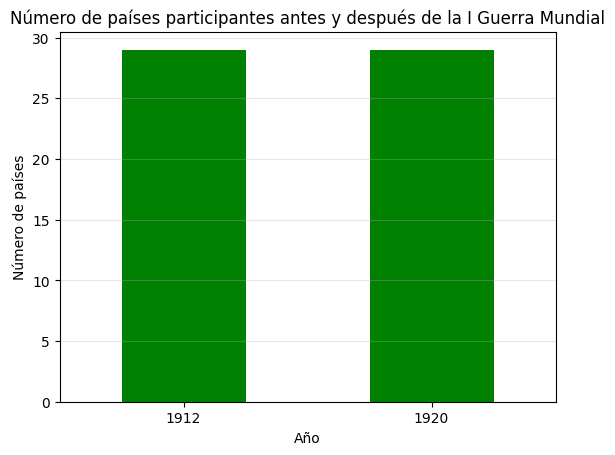

In [122]:
countries_pre_post = (
    jjoo[jjoo["Year"].isin([1912, 1920])]
    .groupby("Year")["Country"]
    .nunique()
)

countries_pre_post.plot(kind="bar", color="green")
plt.title("Número de países participantes antes y después de la I Guerra Mundial")
plt.ylabel("Número de países")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Medallero

In [123]:
medals_1912 = (
    jjoo[(jjoo["Year"] == 1912) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

medals_1920 = (
    jjoo[(jjoo["Year"] == 1920) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_igm = (
    pd.concat([medals_1912, medals_1920], axis=1)
    .fillna(0)
)

impact_medals_igm.columns = ["1912", "1920"]
impact_medals_igm["diff"] = impact_medals_igm["1920"] - impact_medals_igm["1912"]

impact_medals_igm.sort_values("diff").head()

1912   1920  diff
Country                    
UK       170.0  111.0 -59.0
Germany   53.0    0.0 -53.0
Sweden   190.0  154.0 -36.0
Hungary   30.0    0.0 -30.0
Finland   71.0   52.0 -19.0

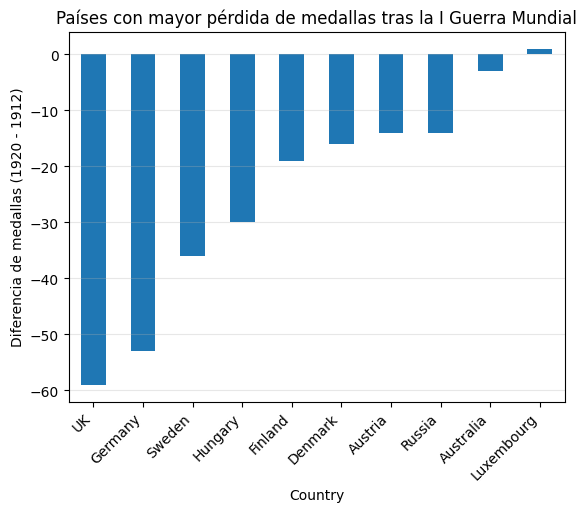

In [124]:
impact_medals_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor pérdida de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

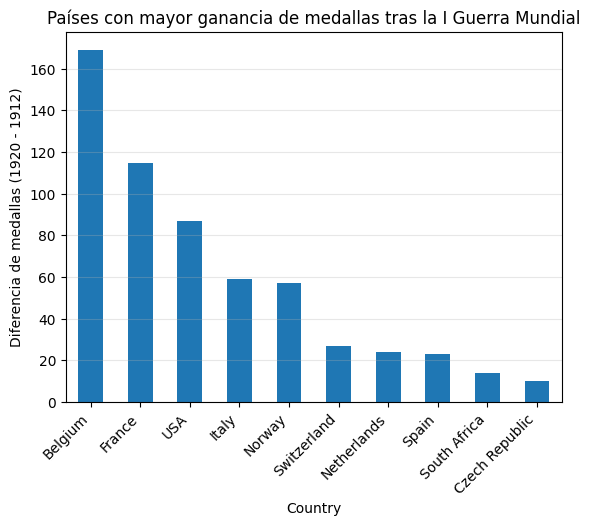

In [125]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor ganancia de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

La Primera Guerra Mundial marca la primera gran ruptura estructural en la historia de los Juegos Olímpicos modernos. La cancelación de los Juegos de 1916, la exclusión política de países en 1920 y la redistribución del medallero evidencian que los grandes conflictos internacionales no solo interrumpen la celebración de los Juegos, sino que transforman su organización y su equilibrio competitivo.

## Periodo de entreguerras (1920–1936)

El periodo de entreguerras se caracteriza por la recuperación progresiva de los Juegos Olímpicos tras la Primera Guerra Mundial y por una creciente politización del deporte. Durante estas ediciones se observa un aumento sostenido de la participación, la reincorporación de países previamente excluidos y el uso de los Juegos como herramienta de proyección internacional, especialmente visible en los Juegos de Berlín de 1936.

In [126]:
interwar = jjoo[(jjoo["Year"] >= 1920) & (jjoo["Year"] <= 1936)]
interwar["Year"].unique()

array([1920, 1932, 1924, 1936, 1928])

### Participacion Atletas

In [127]:
athletes_interwar = (
    interwar
    .groupby("Year")["ID"]
    .nunique()
)

athletes_interwar

Year
1920    2676
1924    3256
1928    3247
1932    1922
1936    4484
Name: ID, dtype: int64

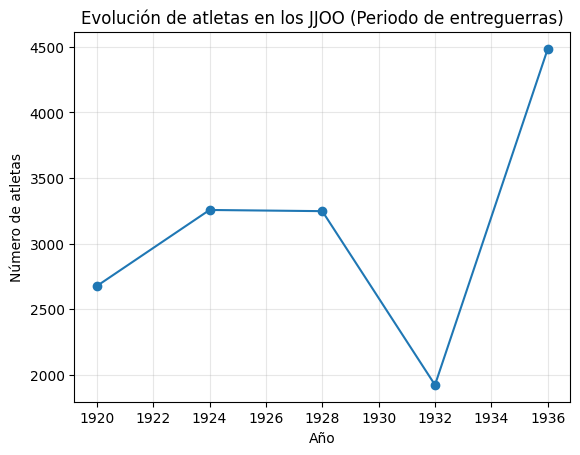

In [128]:
athletes_interwar.plot(marker="o")
plt.title("Evolución de atletas en los JJOO (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

En el 1932 se vuelve a producir una gran caida de la participacion de los atletas debido a la ubicacion de celebracion en Estados unidos.

### Participacion Paises

In [129]:
countries_interwar = (
    interwar
    .groupby("Year")["Country"]
    .nunique()
)

countries_interwar

Year
1920    29
1924    45
1928    46
1932    47
1936    49
Name: Country, dtype: int64

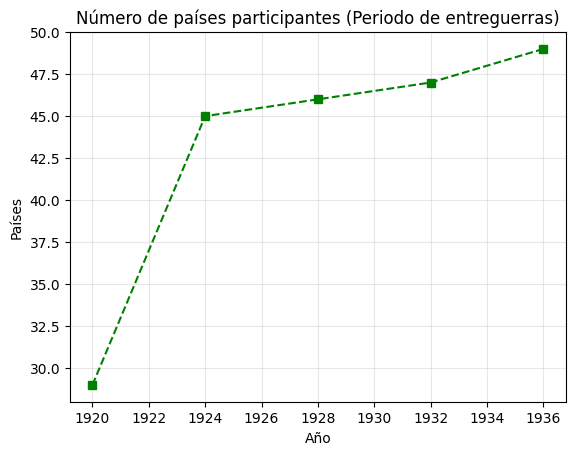

In [130]:
countries_interwar.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

### Medallero

In [131]:
medals_interwar = interwar[interwar["Medal"] != "NoM"]

medals_by_year_interwar = (
    medals_interwar
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_interwar

Year
1920    1308
1924     832
1928     734
1932     647
1936     917
Name: Medal, dtype: int64

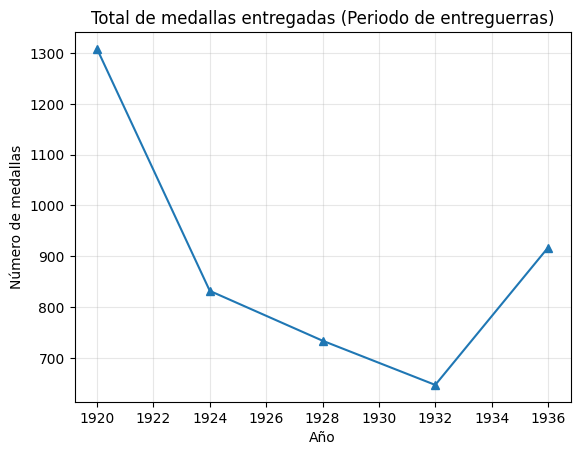

In [132]:
medals_by_year_interwar.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

El total de medallas entregadas no mide la participación directa, sino la estructura y complejidad del programa olímpico. Aunque existe relación entre ambas variables, su comparación permite distinguir entre caídas estructurales del sistema olímpico y descensos coyunturales de participación, como los observados en algunos periodos de crisis política o económica.

In [133]:
top_countries_interwar = (
    medals_interwar
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_interwar

Country
USA        749
France     385
Italy      360
Germany    344
Sweden     330
Name: Medal, dtype: int64

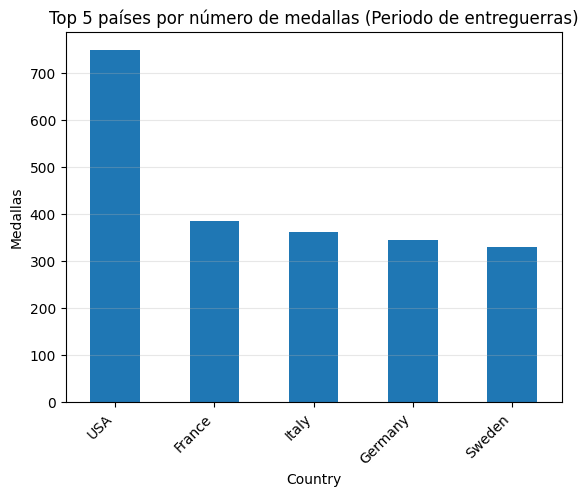

In [134]:
top_countries_interwar.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo de entreguerras)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo de entreguerras muestra una recuperación progresiva de los Juegos Olímpicos tras la ruptura provocada por la Primera Guerra Mundial. La participación de atletas y países aumenta de forma sostenida, aunque se ve afectada por eventos económicos y geográficos, como la caída de 1932. El medallero refleja una mayor competencia internacional y una creciente politización del deporte, culminando en los Juegos de 1936 como expresión máxima de esta etapa.

## Segunda Guerra Mundial (1939–1945)

La Segunda Guerra Mundial supuso la interrupción más prolongada y profunda en la historia de los Juegos Olímpicos modernos. La cancelación de dos ediciones consecutivas, en 1940 y 1944, evidenció la imposibilidad de mantener la continuidad olímpica en un contexto de conflicto global. Este periodo marca una ruptura estructural que tendrá consecuencias directas en la participación y el equilibrio competitivo de la edición de 1948.

In [135]:
jjoo[(jjoo["Year"] >= 1939) & (jjoo["Year"] <= 1945)]["Year"].unique()

array([], dtype=int64)

### Participacion Atletas

In [136]:
athletes_1936 = jjoo[jjoo["Year"] == 1936]["ID"].nunique()
athletes_1948 = jjoo[jjoo["Year"] == 1948]["ID"].nunique()

athletes_1936, athletes_1948

(4484, 4402)

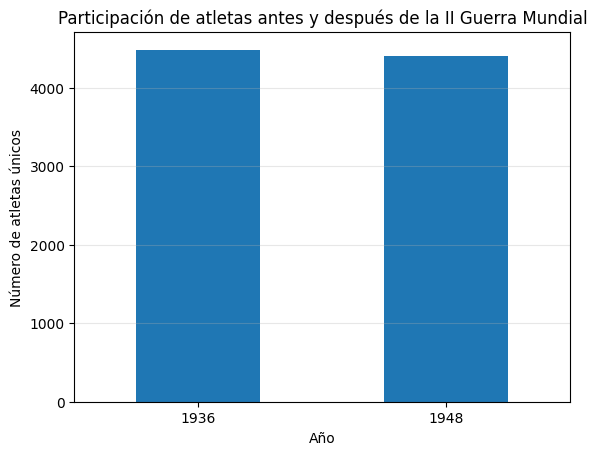

In [137]:
athletes_pre_post_iigm = (
    jjoo[jjoo["Year"].isin([1936, 1948])]
    .groupby("Year")["ID"]
    .nunique()
)

athletes_pre_post_iigm.plot(kind="bar")
plt.title("Participación de atletas antes y después de la II Guerra Mundial")
plt.ylabel("Número de atletas únicos")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Participacion Paises

In [138]:
countries_1936 = jjoo[jjoo["Year"] == 1936]["Country"].nunique()
countries_1948 = jjoo[jjoo["Year"] == 1948]["Country"].nunique()

countries_1936, countries_1948

(49, 59)

In [139]:
countries_1936_list = set(jjoo[jjoo["Year"] == 1936]["Country"].unique())
countries_1948_list = set(jjoo[jjoo["Year"] == 1948]["Country"].unique())

excluded_countries_iigm = countries_1936_list - countries_1948_list
excluded_countries_iigm

{'Boliva',
 'Bulgaria',
 'Costa Rica',
 'Estonia',
 'Germany',
 'Japan',
 'Latvia',
 'Romania'}

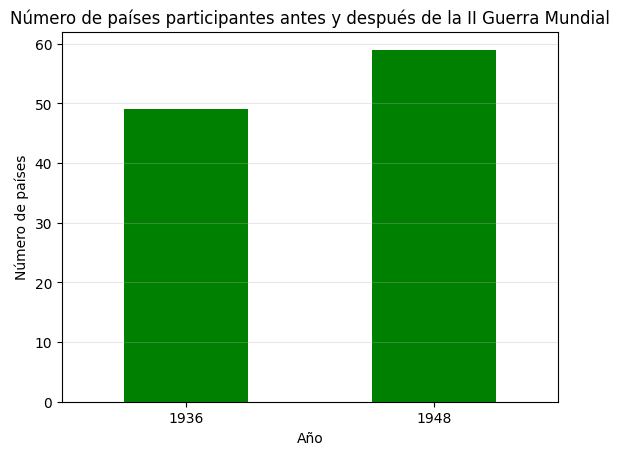

In [140]:
countries_pre_post_iigm = (
    jjoo[jjoo["Year"].isin([1936, 1948])]
    .groupby("Year")["Country"]
    .nunique()
)

countries_pre_post_iigm.plot(kind="bar", color="green")
plt.title("Número de países participantes antes y después de la II Guerra Mundial")
plt.ylabel("Número de países")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Medallero

In [141]:
medals_1936 = (
    jjoo[(jjoo["Year"] == 1936) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

medals_1948 = (
    jjoo[(jjoo["Year"] == 1948) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_iigm = (
    pd.concat([medals_1936, medals_1948], axis=1)
    .fillna(0)
)

impact_medals_iigm.columns = ["1936", "1948"]
impact_medals_iigm["diff"] = impact_medals_iigm["1948"] - impact_medals_iigm["1936"]

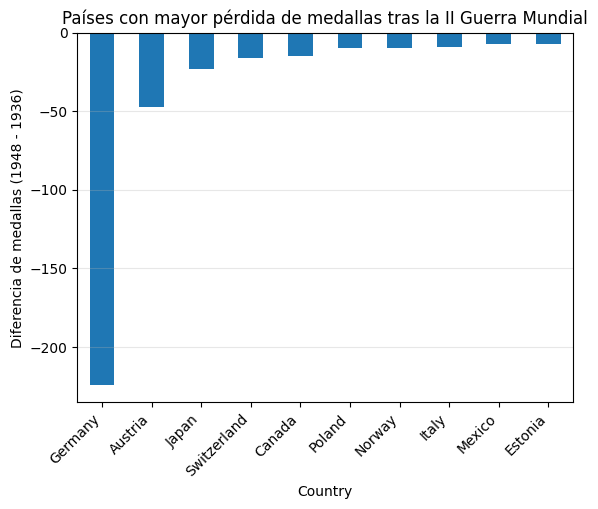

In [142]:
impact_medals_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor pérdida de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

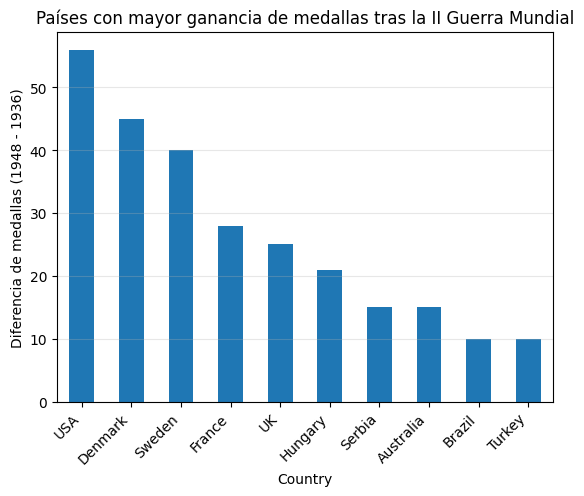

In [143]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor ganancia de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

La Segunda Guerra Mundial representa la ruptura más profunda en la historia de los Juegos Olímpicos modernos. La cancelación de dos ediciones consecutivas y las sanciones aplicadas en 1948 provocaron una reducción significativa en la participación de atletas y países, así como una redistribución del medallero. Este periodo evidencia cómo los grandes conflictos globales no solo interrumpen los Juegos, sino que redefinen temporalmente su estructura y equilibrio competitivo.

## Periodo de posguerra (1948–1960)

El periodo de posguerra representa una fase de reconstrucción y reconfiguración de los Juegos Olímpicos tras la Segunda Guerra Mundial. A partir de los Juegos de Londres 1948, los JJOO recuperan progresivamente su continuidad, en un contexto marcado por la austeridad económica, el inicio de la Guerra Fría y la incorporación de nuevos países al panorama internacional.

In [144]:
postwar = jjoo[(jjoo["Year"] >= 1948) & (jjoo["Year"] <= 1960)]
postwar["Year"].unique()

array([1952, 1948, 1956, 1960])

### Participacion Atletas

In [145]:
athletes_postwar = (
    postwar
    .groupby("Year")["ID"]
    .nunique()
)

athletes_postwar

Year
1948    4402
1952    4932
1956    3347
1960    5352
Name: ID, dtype: int64

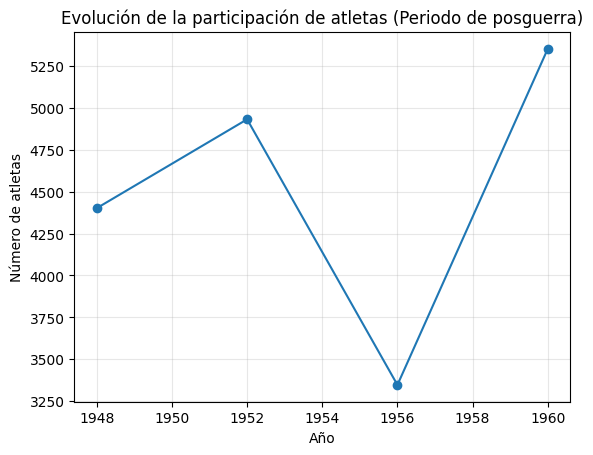

In [146]:

athletes_postwar.plot(marker="o")
plt.title("Evolución de la participación de atletas (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

La caída pronunciada en la participación de atletas observada en los Juegos Olímpicos de 1956 no responde a un retroceso estructural del olimpismo, sino a la concurrencia de factores excepcionales. La celebración de los Juegos en Melbourne supuso importantes dificultades logísticas y económicas para muchos países, mientras que diversos conflictos internacionales, como la Crisis de Suez y la invasión soviética de Hungría, provocaron boicots y ausencias significativas. La rápida recuperación de la participación en 1960 refuerza la idea de que este descenso fue coyuntural y no un cambio de tendencia.

### Participacion Paises

In [147]:
countries_postwar = (
    postwar
    .groupby("Year")["Country"]
    .nunique()
)

countries_postwar

Year
1948    59
1952    67
1956    71
1960    83
Name: Country, dtype: int64

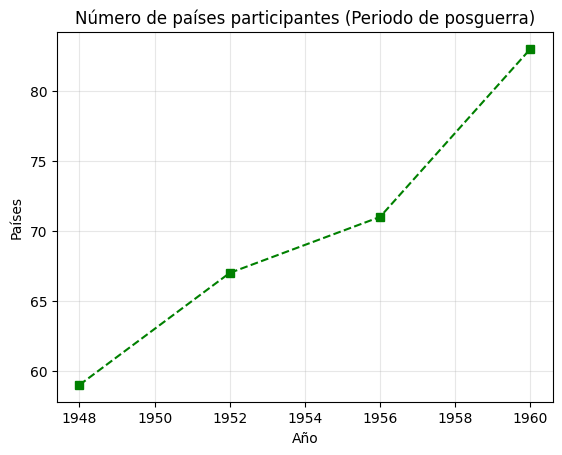

In [148]:
countries_postwar.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

### Medallero

In [149]:
medals_postwar = postwar[postwar["Medal"] != "NoM"]

medals_by_year_postwar = (
    medals_postwar
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_postwar

Year
1948    852
1952    897
1956    893
1960    911
Name: Medal, dtype: int64

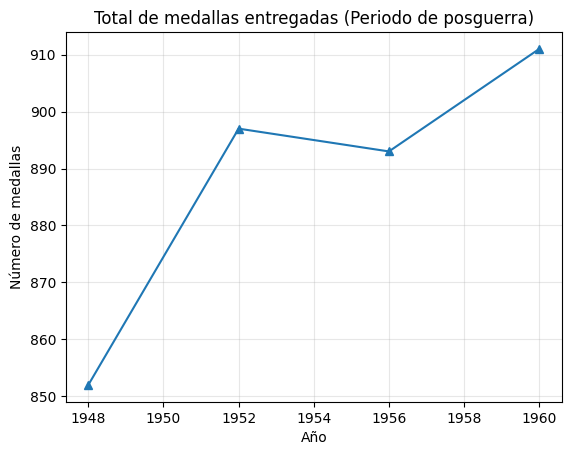

In [150]:
medals_by_year_postwar.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

In [151]:
top_countries_postwar = (
    medals_postwar
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_postwar

Country
USA        534
Russia     455
Hungary    294
Italy      256
Sweden     186
Name: Medal, dtype: int64

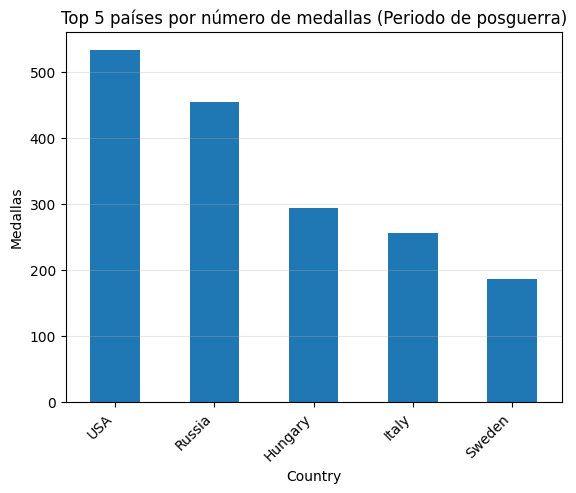

In [152]:
top_countries_postwar.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo de posguerra)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo de posguerra se caracteriza por una recuperación progresiva y sostenida de los Juegos Olímpicos. Tanto la participación de atletas como el número de países aumentan de forma constante, mientras que el medallero refleja una mayor diversidad de actores. Esta etapa marca la transición hacia unos Juegos Olímpicos más globales y estructuralmente estables, en un contexto internacional definido por la reconstrucción y el inicio de la Guerra Fría.

## Periodo moderno de los Juegos Olímpicos (1964 en adelante)

El periodo moderno de los Juegos Olímpicos se caracteriza por la consolidación definitiva del olimpismo como un evento deportivo global. A partir de la década de 1960 se observa una expansión sostenida en la participación de atletas y países, impulsada por la descolonización, la profesionalización del deporte y el creciente papel de los Juegos como escenario de competencia simbólica durante la Guerra Fría.

In [153]:
modern = jjoo[jjoo["Year"] >= 1964]
modern["Year"].unique()[:10]  # primeras ediciones del periodo

array([1992, 2012, 2000, 1996, 2008, 2016, 2004, 1984, 1968, 1972])

### Participacion Atletas

In [154]:
athletes_modern = (
    modern
    .groupby("Year")["ID"]
    .nunique()
)

athletes_modern

Year
1964     5137
1968     5558
1972     7114
1976     6073
1980     5259
1984     6798
1988     8454
1992     9386
1996    10339
2000    10647
2004    10557
2008    10899
2012    10517
2016    11179
Name: ID, dtype: int64

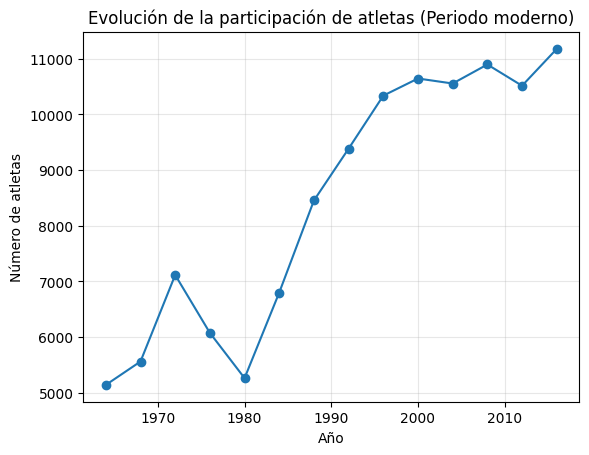

In [155]:
athletes_modern.plot(marker="o")
plt.title("Evolución de la participación de atletas (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

### Participacion Paises

In [156]:
countries_modern = (
    modern
    .groupby("Year")["Country"]
    .nunique()
)

countries_modern

Year
1964     93
1968    111
1972    120
1976     91
1980     80
1984    139
1988    156
1992    168
1996    196
2000    199
2004    200
2008    203
2012    204
2016    206
Name: Country, dtype: int64

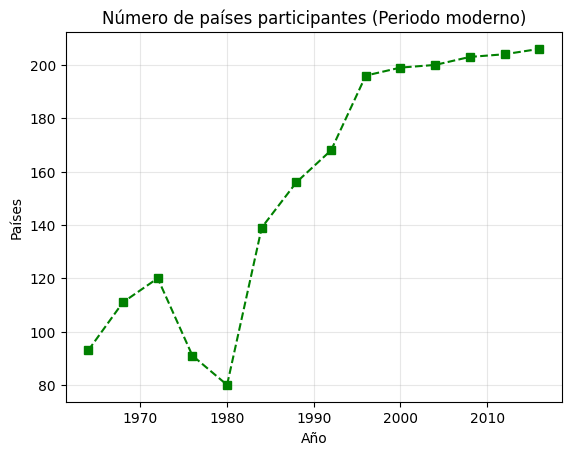

In [157]:
countries_modern.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

Durante la década de 1980 se producen caídas puntuales en la participación olímpica asociadas a boicots políticos, especialmente en los Juegos de 1980 y 1984. Sin embargo, a diferencia de periodos anteriores, el total de medallas entregadas se mantiene relativamente estable, lo que refleja la madurez institucional del sistema olímpico y su capacidad para absorber perturbaciones políticas sin comprometer su estructura.

### Medallero

In [158]:
medals_modern = modern[modern["Medal"] != "NoM"]

medals_by_year_modern = (
    medals_modern
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_modern

Year
1964    1029
1968    1057
1972    1215
1976    1320
1980    1384
1984    1476
1988    1582
1992    1712
1996    1842
2000    2004
2004    2001
2008    2048
2012    1941
2016    2023
Name: Medal, dtype: int64

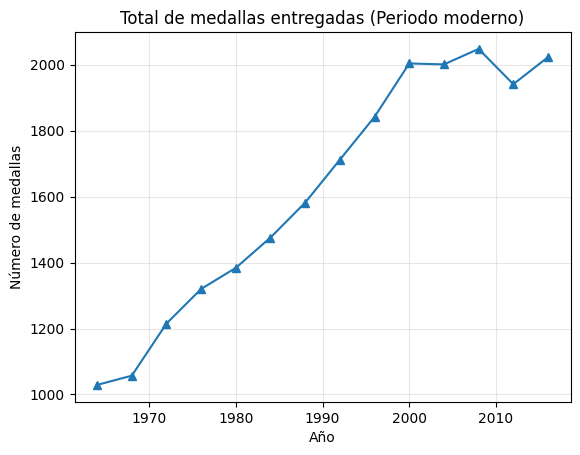

In [159]:
medals_by_year_modern.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

In [160]:
top_countries_modern = (
    medals_modern
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_modern

Country
USA          3046
Russia       2716
Germany      2404
Australia    1112
China         913
Name: Medal, dtype: int64

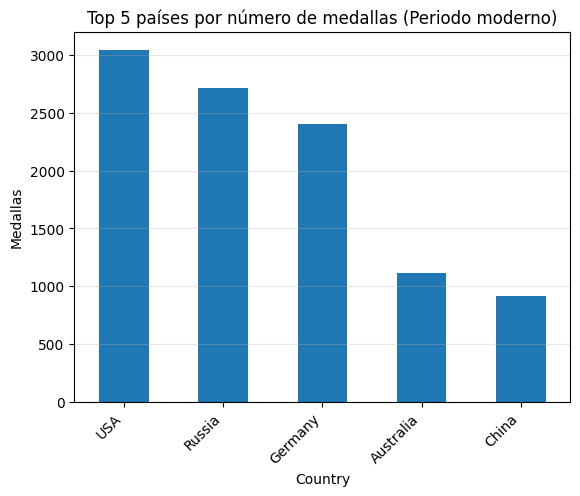

In [161]:
top_countries_modern.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo moderno)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo moderno de los Juegos Olímpicos se caracteriza por un crecimiento estructural y sostenido en la participación de atletas y países, así como por una mayor diversidad competitiva en el medallero. A diferencia de etapas anteriores, los eventos políticos o económicos no generan rupturas prolongadas, lo que refleja la madurez y consolidación del sistema olímpico como un evento deportivo global.

In [162]:
top5_countries = (
    jjoo[jjoo["Medal"] != "NoM"]
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top5_countries

Index(['USA', 'Russia', 'Germany', 'UK', 'France'], dtype='object', name='Country')

In [163]:
athletes_top5 = (
    jjoo[jjoo["Country"].isin(top5_countries)]
    .groupby(["Year", "Country"])["ID"]
    .nunique()
    .reset_index()
)

In [164]:
medals_top5 = (
    jjoo[
        (jjoo["Country"].isin(top5_countries)) &
        (jjoo["Medal"] != "NoM")
    ]
    .groupby(["Year", "Country"])["Medal"]
    .count()
    .reset_index()
)

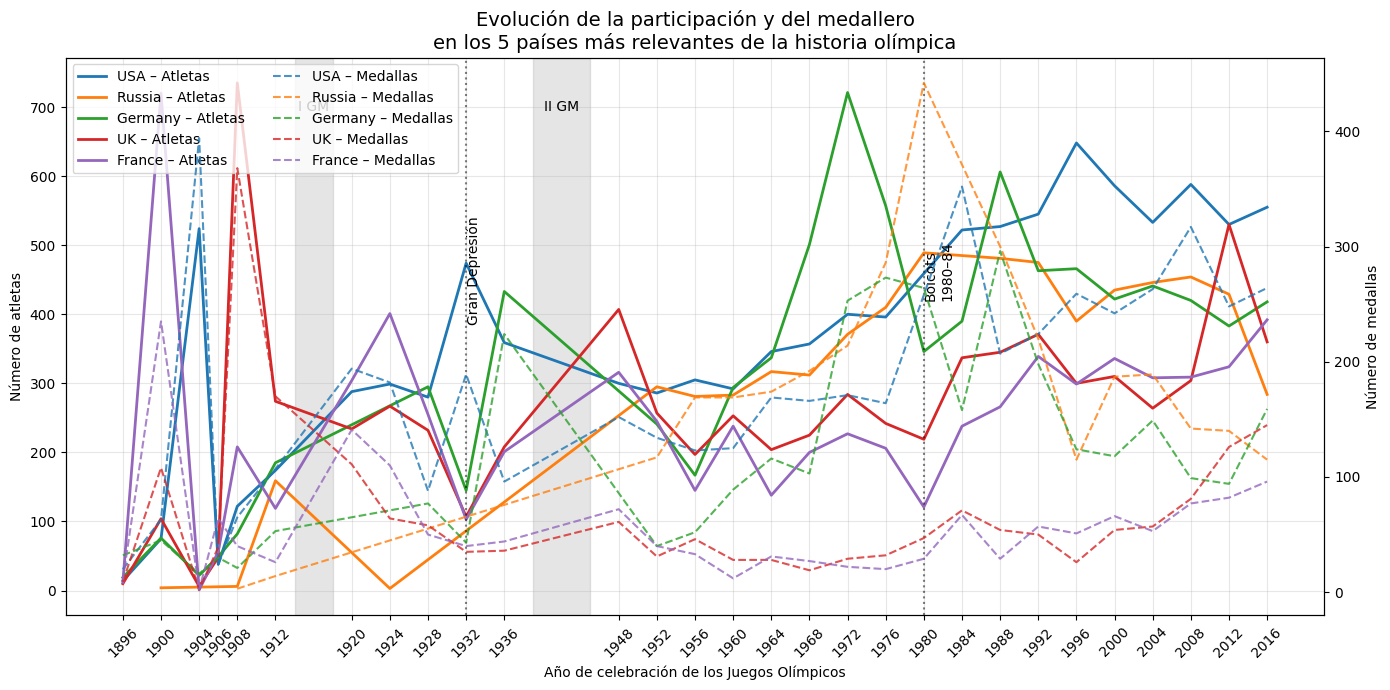

In [165]:
# Años reales de celebración de JJOO
olympic_years = sorted(jjoo["Year"].unique())

fig, ax1 = plt.subplots(figsize=(14,7))

colors = plt.cm.tab10.colors

# ===== EJE IZQUIERDO: ATLETAS =====
for i, country in enumerate(top5_countries):
    data = athletes_top5[athletes_top5["Country"] == country]
    ax1.plot(
        data["Year"],
        data["ID"],
        label=f"{country} – Atletas",
        color=colors[i],
        linewidth=2
    )

ax1.set_xlabel("Año de celebración de los Juegos Olímpicos")
ax1.set_ylabel("Número de atletas")
ax1.set_xticks(olympic_years)
ax1.set_xticklabels(olympic_years, rotation=45)
ax1.grid(alpha=0.3)

# ===== EJE DERECHO: MEDALLAS =====
ax2 = ax1.twinx()

for i, country in enumerate(top5_countries):
    data = medals_top5[medals_top5["Country"] == country]
    ax2.plot(
        data["Year"],
        data["Medal"],
        linestyle="--",
        color=colors[i],
        alpha=0.8,
        label=f"{country} – Medallas"
    )

ax2.set_ylabel("Número de medallas")

# ===== GUERRAS MUNDIALES =====
ax1.axvspan(1914, 1918, color="grey", alpha=0.2)
ax1.axvspan(1939, 1945, color="grey", alpha=0.2)

ax1.text(1916, ax1.get_ylim()[1]*0.9, "I GM", ha="center")
ax1.text(1942, ax1.get_ylim()[1]*0.9, "II GM", ha="center")

# ===== EVENTOS CLAVE =====
ax1.axvline(1932, linestyle=":", color="black", alpha=0.5)
ax1.text(1932, ax1.get_ylim()[1]*0.6, "Gran Depresión", rotation=90, va="center")

ax1.axvline(1980, linestyle=":", color="black", alpha=0.5)
ax1.text(1980, ax1.get_ylim()[1]*0.6, "Boicots\n1980–84", rotation=90, va="center")

# ===== TÍTULO =====
plt.title(
    "Evolución de la participación y del medallero\n"
    "en los 5 países más relevantes de la historia olímpica",
    fontsize=14
)

# ===== LEYENDA LIMPIA =====
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper left",
    ncol=2
)

plt.tight_layout()
plt.show()

El gráfico combina la evolución de la participación de atletas y del número de medallas en los cinco países más relevantes de la historia olímpica, utilizando exclusivamente los años en los que se celebraron los Juegos Olímpicos. La diferenciación mediante líneas continuas (atletas) y discontinuas (medallas) permite comparar la evolución de la participación y el rendimiento deportivo. Se observan rupturas estructurales durante las Guerras Mundiales, así como descensos coyunturales asociados a crisis económicas y boicots políticos, mientras que el periodo moderno muestra un crecimiento sostenido y estable.

El gráfico de síntesis evidencia que la trayectoria olímpica de Alemania está estrechamente vinculada a su historia política. Alemania se consolida tempranamente como potencia deportiva, sufre exclusiones totales tras las Guerras Mundiales y experimenta una profunda transformación durante el periodo de división, en el que el deporte se convierte en un instrumento de competencia ideológica. Tras la reunificación, Alemania mantiene una presencia olímpica sólida y estable, reflejando la transición hacia un modelo deportivo más equilibrado y sostenible.

## Impacto de las Guerras Mundiales en los Juegos Olimpicos (Participacion  y medallas)
Las Guerras Mundiales tuvieron un impacto significativo en la participación de países y atletas en los Juegos Olímpicos, ademas de la distribucion de las medallas entre estos especialmente en los periodos inmediatamente posteriores a los conflictos.

¿Se observa una ruptura en la participación durante las Guerras Mundiales?

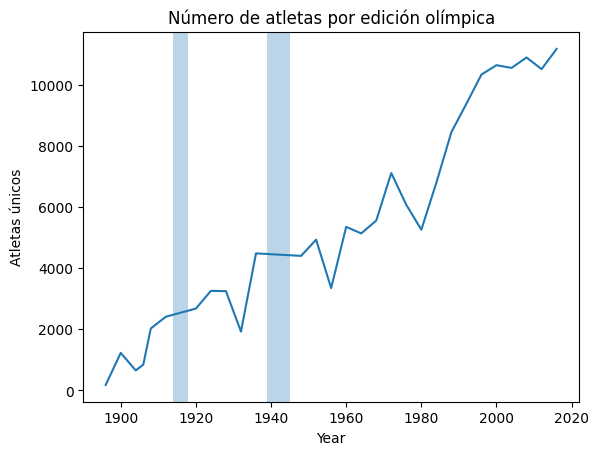

In [166]:
athletes_per_year = jjoo.groupby("Year")["ID"].nunique()

import matplotlib.pyplot as plt

plt.figure()
athletes_per_year.plot()
plt.axvspan(1914, 1918, alpha=0.3)
plt.axvspan(1939, 1945, alpha=0.3)
plt.title("Número de atletas por edición olímpica")
plt.ylabel("Atletas únicos")
plt.show()

El gráfico muestra una tendencia creciente en la participación olímpica a lo largo del tiempo, interrumpida claramente durante los periodos correspondientes a la Primera y Segunda Guerra Mundial. Estas rupturas rompen la tendencia ascendente y evidencian el impacto de los conflictos bélicos en la celebración y escala de los Juegos Olímpicos. La recuperación posterior no es inmediata, lo que sugiere efectos desiguales entre países.

## I Guerra Mundial (análisis por países) PARTICIPACION

¿Qué países reducen más su participación tras la IGM?

In [167]:
before_igm = jjoo[jjoo["Year"] == 1912]
after_igm  = jjoo[jjoo["Year"] == 1920]

ath_1912 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1920 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_igm = (
    pd.concat([ath_1912, ath_1920], axis=1)
    .fillna(0)
)
impact_igm.columns = ["1912", "1920"]
impact_igm["diff"] = impact_igm["1920"] - impact_igm["1912"]

impact_igm.sort_values("diff").head(10)

1912   1920   diff
Country                       
Germany    185.0    0.0 -185.0
Sweden     444.0  260.0 -184.0
Russia     159.0    0.0 -159.0
Hungary    121.0    0.0 -121.0
Finland    164.0   63.0 -101.0
Austria     85.0    0.0  -85.0
UK         274.0  234.0  -40.0
Chile       14.0    2.0  -12.0
Australia   25.0   13.0  -12.0
Turkey       2.0    0.0   -2.0

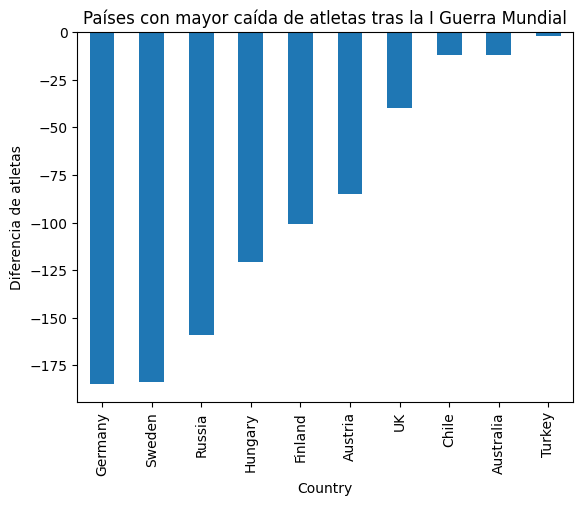

In [168]:
impact_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El análisis por países tras la Primera Guerra Mundial revela un impacto claramente desigual en la participación olímpica. Países europeos como Alemania, Austria, Hungría y Rusia presentan las mayores caídas en el número de atletas entre 1912 y 1920, llegando en algunos casos a no participar en los Juegos posteriores al conflicto. Esta reducción puede explicarse por las consecuencias políticas, económicas y demográficas de la guerra, así como por sanciones y exclusiones en el contexto de posguerra. Por el contrario, países menos afectados directamente por el conflicto muestran descensos más moderados, lo que refuerza la idea de un impacto regionalmente desigual.

## II Guerra Mundial (análisis por países) PARTICIPACION

In [169]:
before_iigm = jjoo[jjoo["Year"] == 1936]
after_iigm  = jjoo[jjoo["Year"] == 1948]

ath_1936 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1948 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_iigm = (
    pd.concat([ath_1936, ath_1948], axis=1)
    .fillna(0)
)
impact_iigm.columns = ["1936", "1948"]
impact_iigm["diff"] = impact_iigm["1948"] - impact_iigm["1936"]

impact_iigm.sort_values("diff").head(10)


1936   1948   diff
Country                       
Germany    185.0    0.0 -185.0
Sweden     444.0  260.0 -184.0
Russia     159.0    0.0 -159.0
Hungary    121.0    0.0 -121.0
Finland    164.0   63.0 -101.0
Austria     85.0    0.0  -85.0
UK         274.0  234.0  -40.0
Chile       14.0    2.0  -12.0
Australia   25.0   13.0  -12.0
Turkey       2.0    0.0   -2.0

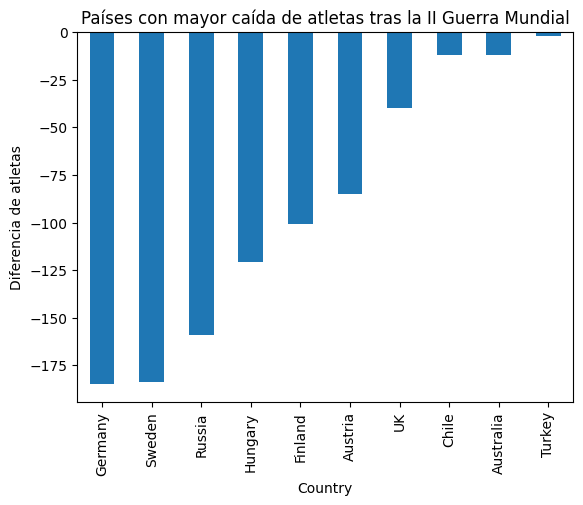

In [170]:
impact_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El gráfico evidencia dos patrones diferenciados en el impacto de la posguerra. Por un lado, países como Alemania, Austria, Hungría o Rusia no registran participación en la edición posterior al conflicto, lo que refleja exclusiones políticas y sanciones internacionales más que una falta de capacidad deportiva. Por otro lado, países como Finlandia o Suecia sí continúan participando, pero mantienen un número de atletas prácticamente idéntico al observado tras la Primera Guerra Mundial, lo que sugiere un comportamiento estructural de reducción de delegaciones en contextos de posguerra. En conjunto, los datos muestran que el impacto de la guerra no solo se manifiesta en la ausencia total de algunos países, sino también en la repetición de patrones de participación reducida en aquellos que sí logran competir.

In [171]:
impact_iigm.sort_values("diff").tail(10)

1936   1948   diff
Country                            
Brazil            0.0   19.0   19.0
Greece           22.0   47.0   25.0
Spain             0.0   58.0   58.0
Switzerland       7.0   77.0   70.0
Czech Republic   43.0  119.0   76.0
Netherlands      33.0  130.0   97.0
Italy            66.0  174.0  108.0
USA             174.0  288.0  114.0
France          119.0  304.0  185.0
Belgium          36.0  336.0  300.0

## Recuperacion tras las guerras en relacion a la participacion del numero de atletas por pais

## Recuperacion tras la Primera Guerra Mundial

In [172]:
recovery_igm = impact_igm[impact_igm["1920"] > 0]

In [173]:
recovery_igm.sort_values("diff", ascending=False).head(10)

1912   1920   diff
Country                            
Belgium          36.0  336.0  300.0
France          119.0  304.0  185.0
USA             174.0  288.0  114.0
Italy            66.0  174.0  108.0
Netherlands      33.0  130.0   97.0
Czech Republic   43.0  119.0   76.0
Switzerland       7.0   77.0   70.0
Spain             0.0   58.0   58.0
Greece           22.0   47.0   25.0
Brazil            0.0   19.0   19.0

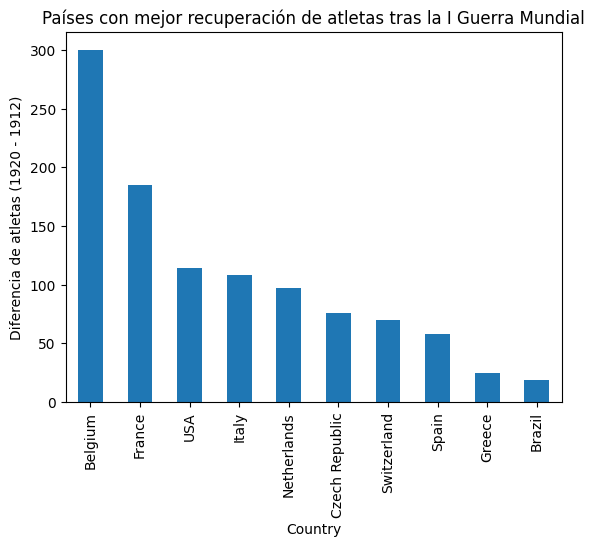

In [174]:
recovery_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas (1920 - 1912)")
plt.show()

Al analizar la recuperación tras la Primera Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1920, se observa que la capacidad de recuperación fue desigual. Algunos países lograron mantener o reducir mínimamente su número de atletas respecto a 1912, mientras que otros sufrieron descensos más acusados. Estos resultados sugieren que, incluso entre los países no sancionados, la recuperación de la participación olímpica estuvo condicionada por factores económicos, organizativos y sociales propios del periodo de posguerra.

## Recuperacion tras Segunda Guerra Mundial

No todos los países parten de las mismas condiciones tras una guerra: algunos fueron excluidos políticamente y no pudieron participar, mientras que otros sí compitieron y, por tanto, pudieron iniciar antes su recuperación deportiva.

In [175]:
recovery_iigm = impact_iigm[impact_iigm["1948"] > 0]

In [176]:
recovery_iigm.sort_values("diff", ascending=False).head(10) #paises con mayor recuperacion

1936   1948   diff
Country                            
Belgium          36.0  336.0  300.0
France          119.0  304.0  185.0
USA             174.0  288.0  114.0
Italy            66.0  174.0  108.0
Netherlands      33.0  130.0   97.0
Czech Republic   43.0  119.0   76.0
Switzerland       7.0   77.0   70.0
Spain             0.0   58.0   58.0
Greece           22.0   47.0   25.0
Brazil            0.0   19.0   19.0

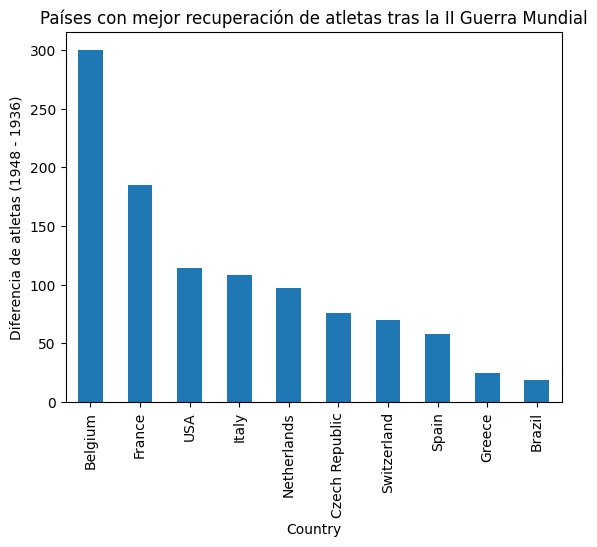

In [177]:
recovery_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas (1948 - 1936)")
plt.show()

Al analizar la recuperación tras la II Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1948, se observa que la recuperación no fue homogénea. Algunos países lograron mantener o incluso aumentar su número de atletas respecto a 1936, lo que sugiere una mayor capacidad de reorganización deportiva y recuperación económica en el periodo de posguerra. En contraste, otros países, aunque no fueron excluidos, muestran una recuperación limitada, reflejando que los efectos del conflicto persistieron más allá del final de la guerra. Este análisis pone de manifiesto que la recuperación olímpica estuvo condicionada tanto por factores políticos como por la situación económica y social de cada país.

# Impacto de las Guerras Mundiales en el número de medallas por país

El análisis de medallas permite evaluar cómo las Guerras Mundiales afectaron no solo a la participación, sino también al rendimiento deportivo de los países, teniendo en cuenta que la ausencia de participación implica automáticamente una pérdida total de medallas.

In [178]:
medals_df = jjoo[jjoo["Medal"] != "NoM"]

## I Guerra Mundial: medallas antes y después (1912 vs 1920)

### Paises perjudicados

In [179]:
medals_1912 = (
    medals_df[medals_df["Year"] == 1912]
    .groupby("Country")["Medal"]
    .count()
)

medals_1920 = (
    medals_df[medals_df["Year"] == 1920]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_igm = (
    pd.concat([medals_1912, medals_1920], axis=1)
    .fillna(0)
)

impact_medals_igm.columns = ["1912", "1920"]
impact_medals_igm["diff"] = impact_medals_igm["1920"] - impact_medals_igm["1912"]

impact_medals_igm.sort_values("diff").head(10)

1912   1920  diff
Country                       
UK          170.0  111.0 -59.0
Germany      53.0    0.0 -53.0
Sweden      190.0  154.0 -36.0
Hungary      30.0    0.0 -30.0
Finland      71.0   52.0 -19.0
Denmark      87.0   71.0 -16.0
Austria      14.0    0.0 -14.0
Russia       14.0    0.0 -14.0
Australia    10.0    7.0  -3.0
Luxembourg    0.0    1.0   1.0

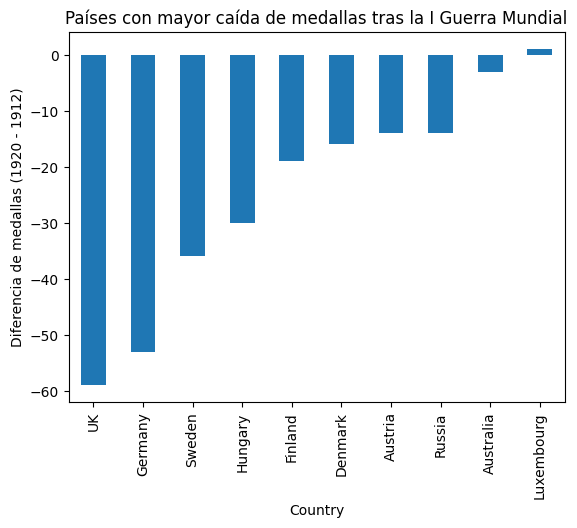

In [180]:
impact_medals_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

### Paises benificiados

In [181]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)

1912   1920   diff
Country                            
Belgium          19.0  188.0  169.0
France           26.0  141.0  115.0
USA             107.0  194.0   87.0
Italy            25.0   84.0   59.0
Norway           80.0  137.0   57.0
Switzerland       2.0   29.0   27.0
Netherlands      26.0   50.0   24.0
Spain             0.0   23.0   23.0
South Africa      7.0   21.0   14.0
Czech Republic    0.0   10.0   10.0

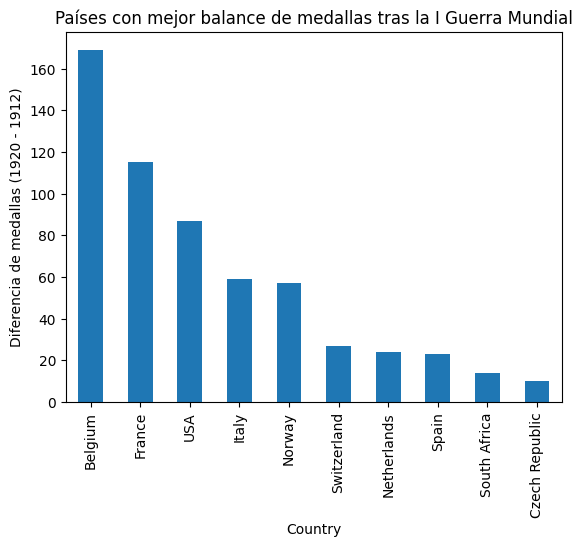

In [182]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

El análisis del número de medallas antes y después de la Primera Guerra Mundial pone de manifiesto un doble efecto del conflicto en el rendimiento olímpico. Por un lado, varios países experimentan una caída muy pronunciada o total en su número de medallas, especialmente aquellos directamente implicados en la guerra o excluidos de los Juegos de 1920, lo que refleja el impacto de las sanciones políticas y las dificultades del periodo de posguerra. Por otro lado, algunos países muestran un aumento o una menor pérdida de medallas, lo que no debe interpretarse únicamente como una mejora deportiva, sino también como consecuencia de la ausencia de competidores históricamente fuertes. En conjunto, los resultados evidencian que la Primera Guerra Mundial no solo perjudicó a determinados países, sino que también alteró el equilibrio competitivo, redistribuyendo el reparto de medallas entre los países participantes.

## II Guerra Mundial: medallas antes y después (1936 vs 1948)

### Paises perjudicados

In [183]:
medals_1936 = (
    medals_df[medals_df["Year"] == 1936]
    .groupby("Country")["Medal"]
    .count()
)

medals_1948 = (
    medals_df[medals_df["Year"] == 1948]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_iigm = (
    pd.concat([medals_1936, medals_1948], axis=1)
    .fillna(0)
)

impact_medals_iigm.columns = ["1936", "1948"]
impact_medals_iigm["diff"] = impact_medals_iigm["1948"] - impact_medals_iigm["1936"]

impact_medals_iigm.sort_values("diff").head(10)

1936  1948   diff
Country                        
Germany      224.0   0.0 -224.0
Austria       55.0   8.0  -47.0
Japan         23.0   0.0  -23.0
Switzerland   52.0  36.0  -16.0
Canada        22.0   7.0  -15.0
Poland        12.0   2.0  -10.0
Norway        28.0  18.0  -10.0
Italy         76.0  67.0   -9.0
Mexico        16.0   9.0   -7.0
Estonia        7.0   0.0   -7.0

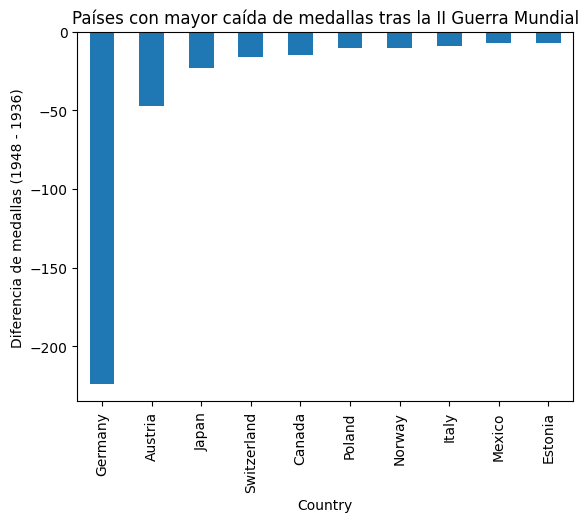

In [184]:
impact_medals_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

### Paises benificiados

In [185]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)

1936   1948  diff
Country                     
USA        96.0  152.0  56.0
Denmark     6.0   51.0  45.0
Sweden     35.0   75.0  40.0
France     44.0   72.0  28.0
UK         36.0   61.0  25.0
Hungary    41.0   62.0  21.0
Serbia      1.0   16.0  15.0
Australia   1.0   16.0  15.0
Brazil      0.0   10.0  10.0
Turkey      2.0   12.0  10.0

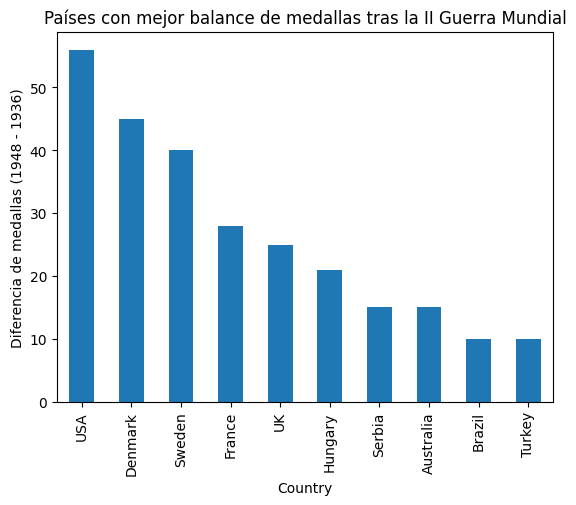

In [186]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

Tras la Segunda Guerra Mundial, el impacto en el número de medallas resulta aún más acusado y generalizado. Numerosos países presentan una pérdida total o muy significativa de medallas debido a su ausencia en los Juegos de 1948, consecuencia directa de sanciones y exclusiones políticas en el contexto de la posguerra. Al mismo tiempo, se observa que algunos países incrementan su número de medallas respecto a 1936, lo que sugiere una redistribución del medallero derivada de una menor competencia internacional. Este fenómeno indica que el conflicto no solo afectó negativamente al rendimiento de los países sancionados, sino que también modificó el balance deportivo global, beneficiando indirectamente a aquellos países que pudieron participar y reorganizarse con mayor rapidez tras la guerra.

Comparando ambos conflictos, se observa que tanto la Primera como la Segunda Guerra Mundial generaron pérdidas significativas de medallas en numerosos países, aunque el impacto de la Segunda Guerra Mundial fue más severo y afectó a un mayor número de países. En ambos casos, las guerras alteraron de forma notable el reparto de medallas, evidenciando que los Juegos Olímpicos reflejan no solo el rendimiento deportivo, sino también las consecuencias de los grandes acontecimientos históricos y políticos

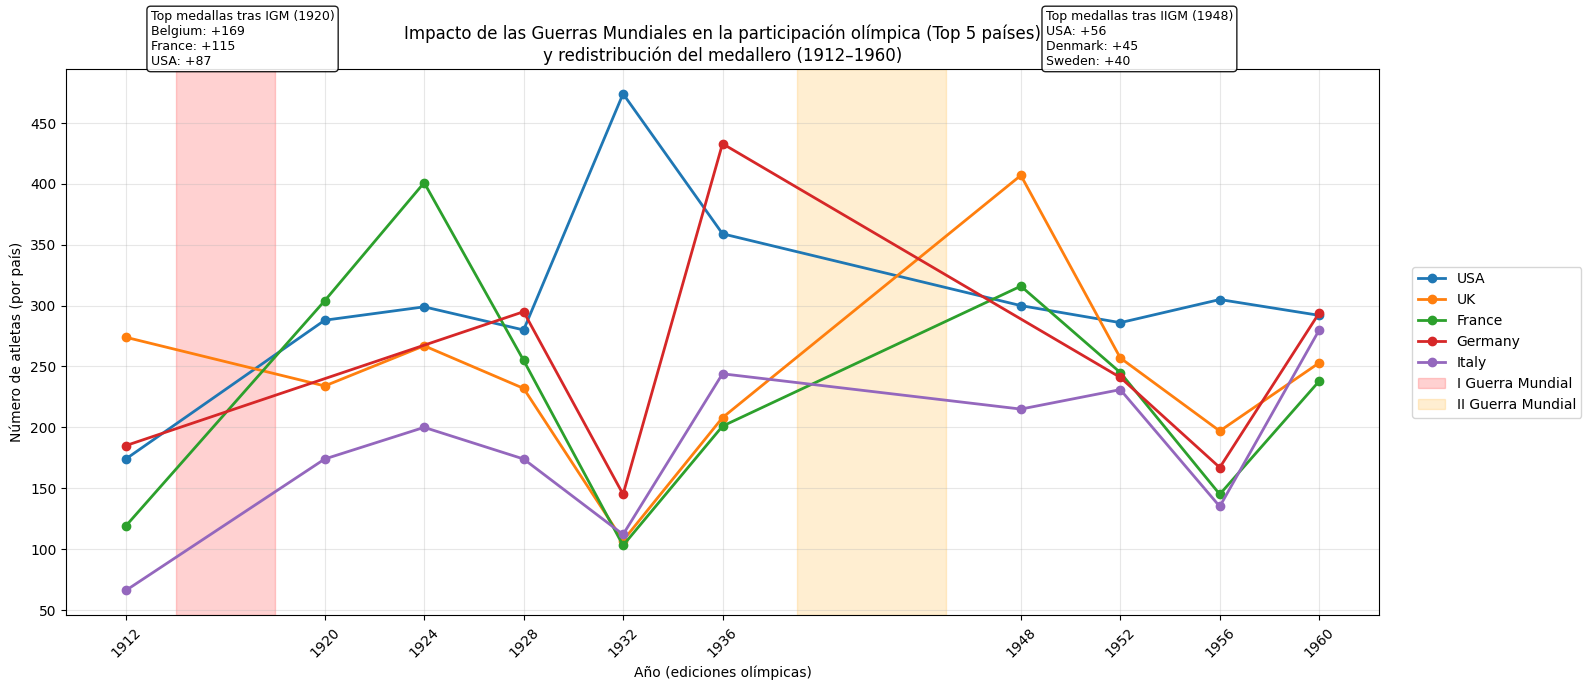

In [187]:
# Periodo de interés
jjoo_period = jjoo[(jjoo["Year"] >= 1912) & (jjoo["Year"] <= 1960)]

# Top 5 países por participación (atletas únicos acumulados en el periodo)
top_countries = (
    jjoo_period
    .groupby("Country")["ID"]
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Serie: atletas por país y año (para las líneas) 
country_year = (
    jjoo_period
    .groupby(["Year", "Country"])["ID"]
    .nunique()
    .reset_index()
)
country_year_top = country_year[country_year["Country"].isin(top_countries)]

# Eje X: años de ediciones olímpicas en el periodo
olympic_years = sorted(jjoo_period["Year"].unique())

plt.figure(figsize=(16, 7))

# Líneas por país (participación) 
for country in top_countries:
    data = country_year_top[country_year_top["Country"] == country]
    plt.plot(
        data["Year"],
        data["ID"],
        marker="o",
        linewidth=2,
        label=country
    )

#  Guerras
plt.axvspan(1914, 1918, color="red", alpha=0.18, label="I Guerra Mundial")
plt.axvspan(1939, 1945, color="orange", alpha=0.18, label="II Guerra Mundial")

#  Medallero:
top_med_igm = impact_medals_igm.sort_values("diff", ascending=False).head(3)
top_med_iigm = impact_medals_iigm.sort_values("diff", ascending=False).head(3)

text_igm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_igm.iterrows()])
text_iigm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_iigm.iterrows()])

# Posición vertical de cajas (arriba del gráfico)
y_top = country_year_top["ID"].max() * 1.05

plt.text(
    1913, y_top,
    f"Top medallas tras IGM (1920)\n{text_igm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)

plt.text(
    1949, y_top,
    f"Top medallas tras IIGM (1948)\n{text_iigm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)


plt.title(
    "Impacto de las Guerras Mundiales en la participación olímpica (Top 5 países)\n"
    "y redistribución del medallero (1912–1960)"
)
plt.xlabel("Año (ediciones olímpicas)")
plt.ylabel("Número de atletas (por país)")
plt.xticks(olympic_years, rotation=45)
plt.grid(alpha=0.3)

# Leyenda fuera para que no tape líneas
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

El gráfico muestra la evolución de la participación olímpica (número de atletas) de los cinco países más participativos entre 1912 y 1960, permitiendo observar caídas, ausencias y recuperaciones diferenciales durante las Guerras Mundiales. Además, se incorpora el “beneficio” en medallas tras cada posguerra (1920 y 1948), lo que evidencia que los conflictos no solo afectan a quién participa, sino también al reparto competitivo: la ausencia o debilitamiento de ciertos países altera el equilibrio del medallero y puede favorecer a otros países en términos de medallas obtenidas.